In [1]:
#Auto reloading 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [3]:
!python setup.py build_ext --inplace

running build_ext
copying build/lib.macosx-10.9-x86_64-3.8/agent_timestep.cpython-38-darwin.so -> 


In [4]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
import generate_stop_dataframe as gen_stop
import generate_stop_dataframe_2 as gen_stop_2
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import matplotlib.pyplot as plt

data_dir = "./Data"
figure_dir = "./Figures"

2022-07-26 17:16:06,343	INFO worker.py:726 -- Connecting to existing Ray cluster at address: 192.168.1.56:6379


# Create pipeline

## Network pipeline

In [5]:
seed = np.random.randint(0,9999999)
#seed = 7915966
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

6941295
[48  8 16 17 37 19 21 47 15 33]


In [6]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl), stop pipeline (stop)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

# Timestep loop

In [7]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline

## Stop signal task 

In [148]:
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': 1, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.95, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #STN
    'stop_signal_present': True,
    'stop_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': -0.6, # amplitude of the stop signal over base line
    'stop_signal_onset': 55., #in ms #antes 200
    'stop_signal_duration' : 160., 
    'stop_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    
    #D2STR
    'stop_signal_present_2': True,
    'stop_signal_probability_2': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude_2': 0.9, # amplitude of the stop signal over base line
    'stop_signal_onset_2': 55., #in ms #antes 200
    'stop_signal_duration_2' : 160.,
    'stop_signal_channel_2': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    'decision_channel' : '1', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
}

In [161]:
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)    

(pid=5163) <class 'float'>
(pid=5163) [0 1 2]
(pid=5163) <class 'float'>
(pid=5163) [2 1 0]
(pid=5163) <class 'float'>
(pid=5163) [0 1 2]
(pid=5163) <class 'float'>
(pid=5163) [2 1 0]
(pid=5163) q_support None
(pid=5163) q_support None


(pid=5163) /Users/cristina/Desktop/Stop_STN+D2/qvalues.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(pid=5163)   Q_df = Q_df.append(
(pid=5163) /Users/cristina/Desktop/Stop_STN+D2/qvalues.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(pid=5163)   Q_df = Q_df.append(


(pid=5163) 2 4 0.161666`
(pid=5163) 2 4 0.161666`
(pid=5163) 2 6 0.32333`
(pid=5163) 2 6 0.32333`
(pid=5163) 3 5 0.161666`
(pid=5163) 3 5 0.161666`
(pid=5163) 3 7 0.32333`
(pid=5163) 3 7 0.32333`
(pid=5163) 12 8 1.0`
(pid=5163) 12 10 1.0`
(pid=5163) 12 8 1.0`
(pid=5163) 12 10 1.0`
(pid=5163) 12 12 0.13`
(pid=5163) 12 14 1.0`
(pid=5163) 12 16 1.0`
(pid=5163) 12 12 0.13`
(pid=5163) 12 14 1.0`
(pid=5163) 12 16 1.0`
(pid=5163) 12 17 0.0725`
(pid=5163) 13 9 1.0`
(pid=5163) 13 11 1.0`
(pid=5163) 12 17 0.0725`
(pid=5163) 13 9 1.0`
(pid=5163) 13 11 1.0`
(pid=5163) 13 13 0.13`
(pid=5163) 13 15 1.0`
(pid=5163) 13 16 1.0`
(pid=5163) 13 13 0.13`
(pid=5163) 13 15 1.0`
(pid=5163) 13 16 1.0`
(pid=5163) 13 17 0.0725`
(pid=5163) 14 8 1.0`
(pid=5163) 14 10 1.0`
(pid=5163) 14 16 0.8334`
(pid=5163) 15 9 1.0`
(pid=5163) 15 11 1.0`
(pid=5163) 13 17 0.0725`
(pid=5163) 14 8 1.0`
(pid=5163) 14 10 1.0`
(pid=5163) 14 16 0.8334`
(pid=5163) 15 9 1.0`
(pid=5163) 15 11 1.0`
(pid=5163) 15 16 0.8334`
(pid=5163) 0 14 1

(pid=5163) /Users/cristina/Desktop/Stop_STN+D2/qvalues.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(pid=5163)   Q_df = Q_df.append(new_data)
(pid=5163) /Users/cristina/Desktop/Stop_STN+D2/qvalues.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(pid=5163)   Q_df = Q_df.append(new_data)


(pid=5163) phasetimer 279
(pid=5163) globaltimer 1449
(pid=5163) gateFRs [28.         30.22222222]
(pid=5163) thresholds_crossed [1]
(pid=5163) other_action 0
(pid=5163) phasetimer 279
(pid=5163) globaltimer 1449
(pid=5163) gateFRs [28.         30.22222222]
(pid=5163) thresholds_crossed [1]
(pid=5163) other_action 0
(pid=5163) phasetimer 301
(pid=5163) globaltimer 1750
(pid=5163) trial_num 1
(pid=5163)   action
(pid=5163) 0   left
(pid=5163) 1  right
(pid=5163) chosen_action right
(pid=5163) Q_support_params.chosen_action[0] right
(pid=5163) trial_num 1
(pid=5163) TRIAL WISE Q DF left       0.5
(pid=5163) right    0.275
(pid=5163) Name: 0, dtype: object
(pid=5163) phasetimer 301
(pid=5163) globaltimer 1750
(pid=5163) trial_num 1
(pid=5163)   action
(pid=5163) 0   left
(pid=5163) 1  right
(pid=5163) chosen_action right
(pid=5163) Q_support_params.chosen_action[0] right
(pid=5163) trial_num 1
(pid=5163) TRIAL WISE Q DF left       0.5
(pid=5163) right    0.275
(pid=5163) Name: 0, dtype: o

(pid=5163) /Users/cristina/Desktop/Stop_STN+D2/qvalues.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(pid=5163)   Q_df = Q_df.append(new_data)
(pid=5163) /Users/cristina/Desktop/Stop_STN+D2/qvalues.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(pid=5163)   Q_df = Q_df.append(new_data)


(pid=5163) phasetimer 301
(pid=5163) globaltimer 2652
(pid=5163) gateFRs [29.33333333 27.33333333]
(pid=5163) thresholds_crossed []
(pid=5163) phasetimer 301
(pid=5163) globaltimer 2652
(pid=5163) gateFRs [29.33333333 27.33333333]
(pid=5163) thresholds_crossed []
(pid=5163) phasetimer 301
(pid=5163) globaltimer 2953
(pid=5163) trial_num 2
(pid=5163)   action
(pid=5163) 0   left
(pid=5163) 1  right
(pid=5163) chosen_action stop
(pid=5163) Q_support_params.chosen_action[0] stop
(pid=5163) trial_num 2
(pid=5163) phasetimer 301
(pid=5163) globaltimer 2953
(pid=5163) trial_num 2
(pid=5163)   action
(pid=5163) 0   left
(pid=5163) 1  right
(pid=5163) chosen_action stop
(pid=5163) Q_support_params.chosen_action[0] stop
(pid=5163) trial_num 2


(pid=5163) /Users/cristina/Desktop/Stop_STN+D2/qvalues.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(pid=5163)   Q_df = Q_df.append(new_data)
(pid=5163) /Users/cristina/Desktop/Stop_STN+D2/qvalues.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(pid=5163)   Q_df = Q_df.append(new_data)


In [ ]:
results[0].keys()

In [ ]:
cbgt.saveResults(results, './Data/1chann_sample_300trials_gotrials_seed_'+str(seed),['popfreqs','popdata', 'datatables'])

In [162]:
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,right,0,268,268,569,569,right,0.0
1,right,1170,1449,279,580,1750,right,1.0
2,stop,2351,2652,301,602,2953,left,0


In [163]:
truetrials_number = 0
truetrials_array = []
stop_percentage = []
none_percentage = []
stop_number = 0
none_number = 0
for i in datatables[0].index:
    if datatables[0].iloc[i]['decisionduration'] > results[0]['stop_signal_onset']:
        truetrials_number += 1
    if datatables[0].iloc[i]['decision'] == 'stop':
        stop_number += 1
    if datatables[0].iloc[i]['decision'] == 'none':
        none_number += 1
truetrials_array.append(truetrials_number)
stop_percentage.append(stop_number/truetrials_number)
none_percentage.append(none_number/truetrials_number)
print('true trials', truetrials_number)
print('stop numbers', stop_number)
print('stop percentage', stop_percentage)
print('none numbers', none_number)
print('none percentage', none_percentage)

true trials 3
stop numbers 1
stop percentage [0.3333333333333333]
none numbers 0
none percentage [0.0]


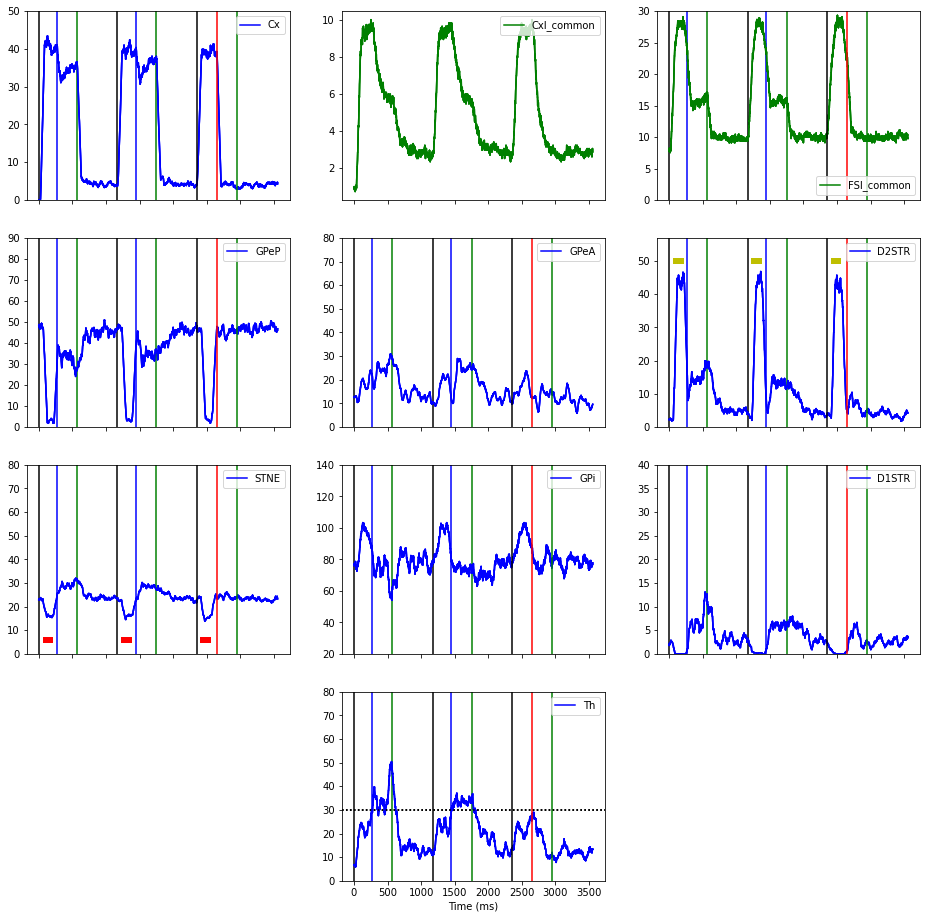

In [164]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(16,16), sharex=True)
plt_func.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='D1STR_left', c = 'y', ax=ax2[1])
    results[0]['popfreqs'].plot(x='Time (ms)', y='D1STR_right', c = 'b', ax=ax3[2])
    ax3[2].vlines(datatables[0].stimulusstarttime[i],0,100,'k')
    if datatables[0].decision[i] == 'right':
        ax3[2].vlines(datatables[0].decisiontime[i],0,100,'b')
    elif datatables[0].decision[i] == 'left':
        ax3[2].vlines(datatables[0].decisiontime[i],0,100,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[2].vlines(datatables[0].decisiontime[i],0,100,'r')
    else: 
        ax3[2].vlines(datatables[0].decisiontime[i],0,100,'m')
    ax3[2].vlines(datatables[0].rewardtime[i],0,100,'g')
    ax3[2].legend(['D1STR'], loc = 'best') #(['D1STR_left', 'D1STR_right'], loc = 'best')
        

    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax2[0])
    ax2[0].vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'m')
    ax2[0].vlines(datatables[0].rewardtime[i],0,130,'g')
    ax2[0].legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax2[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    #if results[0]['stop_signal_present_2'] == True:
        #ax2[0].hlines(y=84, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)


    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_right', c ='b', ax=ax2[1])
    ax2[1].vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'m')
    ax2[1].vlines(datatables[0].rewardtime[i],0,130,'g')
    ax2[1].legend(['GPeA'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present_2'] == True:
        #ax2[1].hlines(y=50, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)

    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_left', c ='y', ax=ax3[1])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_right', c ='b', ax=ax3[1])
    ax3[1].vlines(datatables[0].stimulusstarttime[i],0, 170,'k') 
    if datatables[0].decision[i] == 'right':
        ax3[1].vlines(datatables[0].decisiontime[i],0,170,'b')
    elif datatables[0].decision[i] == 'left':
        ax3[1].vlines(datatables[0].decisiontime[i],0,170,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[1].vlines(datatables[0].decisiontime[i],0,170,'r')
    else: 
         ax3[1].vlines(datatables[0].decisiontime[i],0,170,'m')
    ax3[1].vlines(datatables[0].rewardtime[i],0,170,'g')
    ax3[1].legend(['GPi'], loc = 'best') #(['GPi_left', 'GPi_right'], loc = 'best')


    #results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_left', c ='y', ax=ax2[2])
    results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_right', c ='b', ax=ax2[2])
    ax2[2].vlines(datatables[0].stimulusstarttime[i],0,100,'k')
    if datatables[0].decision[i] == 'right':
        ax2[2].vlines(datatables[0].decisiontime[i],0,100,'b')
    elif datatables[0].decision[i] == 'left':
        ax2[2].vlines(datatables[0].decisiontime[i],0,100,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[2].vlines(datatables[0].decisiontime[i],0,100,'r')
    else: 
        ax2[2].vlines(datatables[0].decisiontime[i],0,100,'m')
    ax2[2].vlines(datatables[0].rewardtime[i],0,100,'g')
    ax2[2].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    if results[0]['stop_signal_present_2'] == True:
        ax2[2].hlines(y=50, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='y', ax=ax3[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax3[0])
    ax3[0].vlines(datatables[0].stimulusstarttime[i], 0,150,'k')
    if datatables[0].decision[i] == 'right':
        ax3[0].vlines(datatables[0].decisiontime[i], 0, 150, 'b')
    elif datatables[0].decision[i] == 'left':
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'r')
    else: 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'm')
    ax3[0].vlines(datatables[0].rewardtime[i], 0, 150,'g')
    ax3[0].legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax3[0].hlines(y=6, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    

    #results[0]['popfreqs'].plot(x='Time (ms)', y='Th_left', c ='y', ax=ax3[2])
    results[0]['popfreqs'].plot(x='Time (ms)', y='Th_right', c ='b', ax=ax4[1])
    ax4[1].vlines(datatables[0].stimulusstarttime[i],0,100,'k')
    if datatables[0].decision[i] == 'right':
        ax4[1].vlines(datatables[0].decisiontime[i],0,100,'b')
    elif datatables[0].decision[i] == 'left':
        ax4[1].vlines(datatables[0].decisiontime[i],0,100,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax4[1].vlines(datatables[0].decisiontime[i],0,100,'r')
    else: 
        ax4[1].vlines(datatables[0].decisiontime[i],0,100,'m')
    ax4[1].vlines(datatables[0].rewardtime[i],0,100,'g')
    ax4[1].axhline(y=30, c='k', linestyle='dotted')
    ax4[1].legend(['Th'], loc = 'best') #(['Th_left', 'Th_right'], loc = 'best')
    
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='Cx_left', c ='y', ax=ax1[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='Cx_right', c ='b', ax=ax1[0])
    ax1[0].vlines(datatables[0].stimulusstarttime[i],0,75,'k') 
    if datatables[0].decision[i] == 'right':
        ax1[0].vlines(datatables[0].decisiontime[i],0,75,'b')
    elif datatables[0].decision[i] == 'left':
        ax1[0].vlines(datatables[0].decisiontime[i],0,75,'y')
    elif datatables[0].decision[i] == 'stop':
        ax1[0].vlines(datatables[0].decisiontime[i],0,75,'r')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,75,'m')
    ax1[0].vlines(datatables[0].rewardtime[i],0,75,'g')
    ax1[0].legend(['Cx'], loc = 'best') #(['Cx_left', 'Cx_right'], loc = 'best')
   
    results[0]['popfreqs'].plot(x='Time (ms)', y='CxI_common', c ='g', ax=ax1[1])
    ax1[1].legend(['CxI_common'], loc = 'upper right')

    results[0]['popfreqs'].plot(x='Time (ms)', y='FSI_common', c ='g', ax=ax1[2])
    ax1[2].legend(['FSI_common'], loc = 'lower right')
    ax1[2].vlines(datatables[0].stimulusstarttime[i],0,75,'k') 
    if datatables[0].decision[i] == 'right':
        ax1[2].vlines(datatables[0].decisiontime[i],0,75,'b')
    elif datatables[0].decision[i] == 'left':
        ax1[2].vlines(datatables[0].decisiontime[i],0,75,'y')
    elif datatables[0].decision[i] == 'stop':
        ax1[2].vlines(datatables[0].decisiontime[i],0,75,'r')
    else: 
        ax1[2].vlines(datatables[0].decisiontime[i],0,75,'m')
    ax1[2].vlines(datatables[0].rewardtime[i],0,75,'g')
    
    
    
ax1[0].set_ylim(0, 50)
ax1[2].set_ylim(0, 30)
ax2[0].set_ylim(0, 90)
ax2[1].set_ylim(0, 80)
ax2[2].set_ylim(0, 57)
ax3[2].set_ylim(0, 40)
ax3[0].set_ylim(0, 80)
ax3[1].set_ylim(20, 140)
#ax1[2].set_ylim(5, 30)
ax4[1].set_ylim(0,80)
ax4[0].set_axis_off()
ax4[2].set_axis_off()
#plt.xlim(0, 1300)   
plt.savefig('./Figures/FRs_STN'+'_'+str(seed)+'.png', dpi=400) #+str(results[0]['stop_signal_amplitude'])+'_'+str(seed)+'.png', dpi=400)

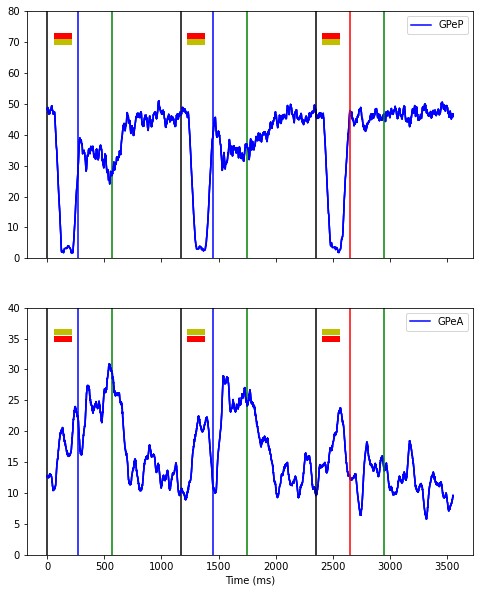

In [165]:
#D2+STN
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
plt_func.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax1)
    ax1.vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax1.vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax1.vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1.vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax1.vlines(datatables[0].decisiontime[i],0,130,'m')
    ax1.vlines(datatables[0].rewardtime[i],0,130,'g')
    ax1.legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax1.hlines(y=72, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True:
        ax1.hlines(y=70, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)


    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_right', c ='b', ax=ax2)
    ax2.vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax2.vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax2.vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2.vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax2.vlines(datatables[0].decisiontime[i],0,130,'m')
    ax2.vlines(datatables[0].rewardtime[i],0,130,'g')
    ax2.legend(['GPeA'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax2.hlines(y=35, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True:
        ax2.hlines(y=36, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)

ax1.set_ylim(0, 80)
ax2.set_ylim(0, 40)
plt.savefig('./Figures/GPe_d2+STN'+'_'+str(seed)+'.png', dpi=400)


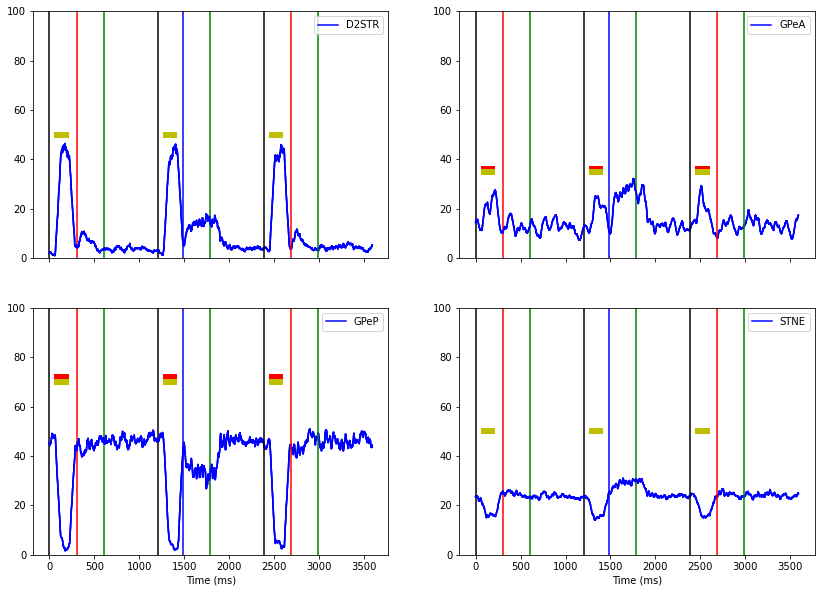

In [120]:
#D2 only 
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
plt_func.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_right', c ='b', ax=ax1[0])
    ax1[0].vlines(datatables[0].stimulusstarttime[i],0,100,'k')
    if datatables[0].decision[i] == 'right':
        ax1[0].vlines(datatables[0].decisiontime[i],0,100,'b')
    elif datatables[0].decision[i] == 'left':
        ax1[0].vlines(datatables[0].decisiontime[i],0,100,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1[0].vlines(datatables[0].decisiontime[i],0,100,'r')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,100,'m')
    ax1[0].vlines(datatables[0].rewardtime[i],0,100,'g')
    ax1[0].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    if results[0]['stop_signal_present_2'] == True:
        ax1[0].hlines(y=50, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax2[0])
    ax2[0].vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'m')
    ax2[0].vlines(datatables[0].rewardtime[i],0,130,'g')
    ax2[0].legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax2[0].hlines(y=72, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True:
        ax2[0].hlines(y=70, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)

    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_right', c ='b', ax=ax1[1])
    ax1[1].vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax1[1].vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax1[1].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1[1].vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax1[1].vlines(datatables[0].decisiontime[i],0,130,'m')
    ax1[1].vlines(datatables[0].rewardtime[i],0,130,'g')
    ax1[1].legend(['GPeA'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax1[1].hlines(y=36, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True:
        ax1[1].hlines(y=35, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='y', ax=ax3[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax2[1])
    ax2[1].vlines(datatables[0].stimulusstarttime[i], 0,150,'k')
    if datatables[0].decision[i] == 'right':
        ax2[1].vlines(datatables[0].decisiontime[i], 0, 150, 'b')
    elif datatables[0].decision[i] == 'left':
        ax2[1].vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[1].vlines(datatables[0].decisiontime[i],0, 150, 'r')
    else: 
        ax2[1].vlines(datatables[0].decisiontime[i],0, 150, 'm')
    ax2[1].vlines(datatables[0].rewardtime[i], 0, 150,'g')
    ax2[1].legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present_2'] == True:
        ax2[1].hlines(y=50, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    
    
ax1[1].set_ylim(0, 100)
ax2[0].set_ylim(0, 100)
ax2[1].set_ylim(0, 100)
ax1[0].set_ylim(0, 100)
plt.savefig('./Figures/GPe_D2'+'_'+str(seed)+'.png', dpi=400)



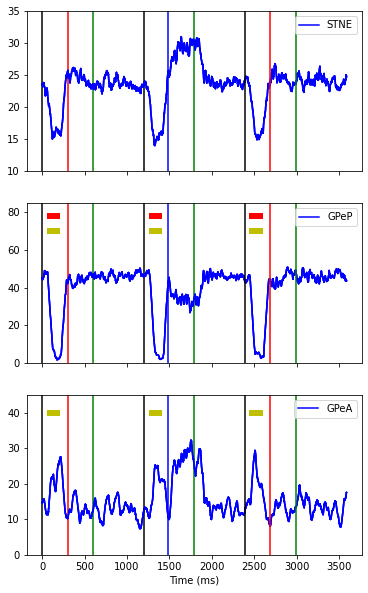

In [119]:
#STN only 
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 10), sharex=True)
plt_func.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax1)
    ax1.vlines(datatables[0].stimulusstarttime[i], 0,150,'k')
    if datatables[0].decision[i] == 'right':
        ax1.vlines(datatables[0].decisiontime[i], 0, 150, 'b')
    elif datatables[0].decision[i] == 'left':
        ax1.vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1.vlines(datatables[0].decisiontime[i],0, 150, 'r')
    else: 
        ax1.vlines(datatables[0].decisiontime[i],0, 150, 'm')
    ax1.vlines(datatables[0].rewardtime[i], 0, 150,'g')
    ax1.legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax1.hlines(y=65, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax2)
    ax2.vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax2.vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax2.vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2.vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax2.vlines(datatables[0].decisiontime[i],0,130,'m')
    ax2.vlines(datatables[0].rewardtime[i],0,130,'g')
    ax2.legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax2.hlines(y=78, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True:
        ax2.hlines(y=70, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)

    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_right', c ='b', ax=ax3)
    ax3.vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax3.vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax3.vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3.vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax3.vlines(datatables[0].decisiontime[i],0,130,'m')
    ax3.vlines(datatables[0].rewardtime[i],0,130,'g')
    ax3.legend(['GPeA'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax3.hlines(y=40, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True:
        ax3.hlines(y=40, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='y', ax=ax3[0])
    
    
ax3.set_ylim(0, 45)
ax2.set_ylim(0, 85)
ax1.set_ylim(10, 35)
plt.savefig('./Figures/GPe_STN'+'_'+str(seed)+'.png', dpi=400)

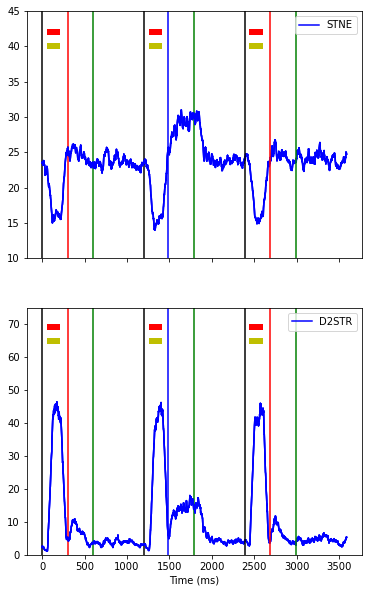

In [126]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10), sharex=True)
plt_func.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax1)
    ax1.vlines(datatables[0].stimulusstarttime[i], 0,150,'k')
    if datatables[0].decision[i] == 'right':
        ax1.vlines(datatables[0].decisiontime[i], 0, 150, 'b')
    elif datatables[0].decision[i] == 'left':
        ax1.vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1.vlines(datatables[0].decisiontime[i],0, 150, 'r')
    else: 
        ax1.vlines(datatables[0].decisiontime[i],0, 150, 'm')
    ax1.vlines(datatables[0].rewardtime[i], 0, 150,'g')
    ax1.legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax1.hlines(y=42, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True:
        ax1.hlines(y=40, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='y', linewidth = 6)
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_right', c ='b', ax=ax2)
    ax2.vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax2.vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax2.vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2.vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax2.vlines(datatables[0].decisiontime[i],0,130,'m')
    ax2.vlines(datatables[0].rewardtime[i],0,130,'g')
    ax2.legend(['D2STR'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax2.hlines(y=69, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True:
        ax2.hlines(y=65, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)

    
    
ax2.set_ylim(0, 75)
ax1.set_ylim(10, 45)
plt.savefig('./Figures/GPe_STND2_stim'+'_'+str(seed)+'.png', dpi=400)

In [ ]:
firing_rates, reward_q_df, performance, rt_dist, total_performance = plt_help.extract_relevant_frames(results,seed)

In [ ]:
plt_func.plot_fr(firing_rates,seed)

In [ ]:
rts = []
for i in datatables[0].index:
    if datatables[0].decision.iloc[i]!= 'none':
        rts.append(datatables[0].decisionduration.iloc[i])
plt.hist(rts, bins= 25, histtype ='bar', align = 'mid', color = 'g', width = 7)
plt.xlabel('RTs_Go trials')
plt.ylabel('Frequency')
plt.title('RTs_Histogram for GO trials')
plt.savefig('./Figures/'+'RTs_hist_GO_3'+'_.png')
plt.show()

In [ ]:
a = []
for i in datatables[0].index: 
    if datatables[0].decision.iloc[i] == 'none':
        a.append(i)
print(len(a))

In [ ]:
failed_trials = 0
for z in datatables[0].index:
    if datatables[0].decision[z] != 'stop' and datatables[0].decisionduration[z]>results[0]['stop_signal_onset']:
        failed_trials += 1
print(failed_trials)

In [ ]:
ratedf = results[0]['popfreqs']
#len(ratedf)
ratedf

### MEAN 

In [ ]:
# CORRECT STOP trials - DATATABLES + FRs
rows_list = []
ratedf = results[0]['popfreqs'].iloc[:, [1, 3, 5, 7, 9, 11, 13, 16, 15, 17, 18]]
ratedf_cs = pd.DataFrame()
for row in datatables[0].index:
    if datatables[0].decision[row] == 'stop': 
        dict_aux = {}
        dict_aux.update(datatables[0].iloc[row]) 
        rows_list.append(dict_aux)
        #print(datatables[0].iloc[row]['stimulusstarttime'])
        #print(ratedf[datatables[0].iloc[row]['stimulusstarttime']:datatables[0].iloc[row]['rewardtime']+601])
        ratedf_cs = ratedf_cs.append(ratedf[datatables[0].iloc[row]['stimulusstarttime']:datatables[0].iloc[row]['rewardtime']+601])
correct_stop = pd.DataFrame(rows_list) 
print(len(correct_stop))
print(len(ratedf_cs))
#ratedf_cs

In [ ]:
import statistics

plt_func.rename_columns(results[0])
ratedf = results[0]['popfreqs'].iloc[:, [1, 3, 5, 7, 9, 11, 13, 16, 15, 17, 18]]
keysInicials=[]
keysFinals=[]
datatables = cbgt.collateVariable(results,'datatables')

#find the inicial key of each trial
for j in datatables[0].stimulusstarttime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1 
    keysInicials.append(i)

keysInicials_correctstop = []
keysInicials_failedstop = []

for z in datatables[0].index: #correctstop
    if datatables[0].decision[z] == 'stop':
        keysInicials_correctstop.append(datatables[0].stimulusstarttime[z])

for z in datatables[0].index: #failed stop
    if datatables[0].decision[z] != 'stop' and datatables[0].decisionduration[z]>results[0]['stop_signal_onset']:
        keysInicials_failedstop.append(datatables[0].stimulusstarttime[z])


#print('Inicials', keysInicials)
#print('Inicials Correct Stop', keysInicials_correctstop)
#print('Inicials Failed Stop', keysInicials_failedstop)

#find the final key of each trial

for j in datatables[0].rewardtime+601:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1    
    keysFinals.append(i-1)  
    
keysFinals_correctstop = []
keysFinals_failedstop = []

for z in datatables[0].index: #correctstop
    if datatables[0].decision[z] == 'stop':
        keysFinals_correctstop.append(datatables[0].rewardtime[z]+601)
    
for z in datatables[0].index: #failed stop
    if datatables[0].decision[z] != 'stop'and datatables[0].decisionduration[z]>results[0]['stop_signal_onset']:
        keysFinals_failedstop.append(datatables[0].rewardtime[z]+601)

#print('Finals', keysFinals)
#print('Finals Correct Stop', keysFinals_correctstop)
#print('Finals Failed Stop', keysFinals_failedstop)

#find the length of the largest trial - Correct stop, always = 601
dif=[]
for i in range(0,len(keysInicials)):
    dif.append(keysFinals[i]-keysInicials[i])
L=max(dif)
print(L)
print(keysInicials_correctstop)
print(keysInicials_failedstop)

#find the length of the largest trial - Failed stop
#dif = []
#for i in range(0,len(keysInicials_failedstop)):
    #dif.append(keysFinals_failedstop[i]-keysInicials_failedstop[i])
      
#L_failed = max(dif)
#print(L_failed)

In [ ]:
ratedf_cs

In [ ]:
print(len(keysFinals_correctstop))
print(len(keysFinals_failedstop))

In [ ]:
#become all datatables of the same length

# CORRECT STOP

Mean_newDic={}
Std_newDic={}

for BGregion in ratedf_cs:
    S=[]
    for i in range(0,len(keysInicials_correctstop)):
        region_i=ratedf[keysInicials_correctstop[i]:keysFinals_correctstop[i]+2].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i=region_i + [-1]
            j=j+1
        S.append(region_i)
    mean_t=[]
    std_t=[]
    for i in range(0,L+1):
        new_list=[]
        for ll in S:
            if ll[i]!= -1:
                new_list.append(ll[i])
        mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
        std_t.append(statistics.stdev(new_list))
    
    Mean_newDic[BGregion]=mean_t
    Std_newDic[BGregion]=std_t
print(len(Mean_newDic['GPi_right']))
#print(new_list)

In [ ]:
#CORRECT STOP trials - MEAN FRs plots

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(16,8), sharex=True)

i=0
tmean=[]
while i<len(Mean_newDic['Cx_right']):
    tmean.append(len(Mean_newDic['Cx_right'])-i)
    i=i+1
tmean.sort()
#print(tmean)
    
#ax1[0].plot(mean_t,Mean_newDic['Cx_left'])
#ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),np.add(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),alpha=.1)
ax1[0].plot(tmean,Mean_newDic['Cx_right'])
ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),np.add(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),alpha=.1)
ax1[0].legend(['Cx']) #(['Cx_A','Cx_B'])
#ax1[0].plot([0,0],[0,max(Mean_newDic['Cx_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax1[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['Cx_right'])+20, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax1[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['Cx_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax1[0].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['Cx_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')


ax1[1].plot(tmean,Mean_newDic['CxI_common'])
ax1[1].fill_between(tmean,np.subtract(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),np.add(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),alpha=.1)
ax1[1].legend(['CxI'])
#ax1[1].plot([0,0],[0,max(Mean_newDic['CxI_common'])],color='k')
for i in range(0,len(correct_stop)):
    ax1[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['CxI_common']), color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax1[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['CxI_common']), colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax1[1].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['CxI_common']), colors='y', linewidth = 1.5, linestyle = 'dotted')
                  
ax1[2].plot(tmean,Mean_newDic['FSI_common'])
ax1[2].fill_between(tmean,np.subtract(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),np.add(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),alpha=.1)
ax1[2].legend(['FSI'])
#ax1[2].plot([0,0],[0,max(Mean_newDic['FSI_common'])],color='k')
for i in range(0,len(correct_stop)):
    ax1[2].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['FSI_common']), color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax1[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['FSI_common']), colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax1[2].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['FSI_common']), colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax2[0].plot(tmean,Mean_newDic['GPeP_left'])
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),alpha=.1)
ax2[0].plot(tmean,Mean_newDic['GPeP_right'])
ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),np.add(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),alpha=.1)
ax2[0].legend(['GPeP']) #(['GPe_left','GPe_right'])
#ax2[0].plot([0,0],[0,max(Mean_newDic['GPeP_right'])+30],color='k')
for i in range(0,len(correct_stop)):
    ax2[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['GPeP_right'])+30, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax2[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPeP_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax2[0].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['GPeP_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax2[0].plot(tmean,Mean_newDic['GPeP_left'])
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),alpha=.1)
ax2[1].plot(tmean,Mean_newDic['GPeA_right'])
ax2[1].fill_between(tmean,np.subtract(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),np.add(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),alpha=.1)
ax2[1].legend(['GPeA']) #(['GPe_left','GPe_right'])
#ax2[0].plot([0,0],[0,max(Mean_newDic['GPeP_right'])+30],color='k')
for i in range(0,len(correct_stop)):
    ax2[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['GPeA_right'])+30, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax2[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPeA_right'])+30, color='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax2[1].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['GPeA_right'])+30, color='y', linewidth = 1.5, linestyle = 'dotted')
                  
#ax2[1].plot(tmean,Mean_newDic['D2STR_left'])
#ax2[1].fill_between(tmean,np.subtract(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),np.add(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),alpha=.1)
ax2[2].plot(tmean,Mean_newDic['D2STR_right'])
ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),np.add(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),alpha=.1)
ax2[2].legend(['D2STR']) #(['iSPN_A','iSPN_B'])
#ax2[1].plot([0,0],[0,max(Mean_newDic['D2STR_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax2[2].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['D2STR_right'])+20, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax2[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['D2STR_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax2[2].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['D2STR_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')

#ax2[2].plot(tmean, Mean_newDic['D1STR_left'])
#ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),np.add(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),alpha=.1)
ax3[2].plot(tmean,Mean_newDic['D1STR_right'])
ax3[2].fill_between(tmean,np.subtract(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),np.add(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),alpha=.1)
ax3[2].legend(['D1STR']) #(['dSPN_A','dSPN_B'])
ax3[2].set_xlabel('Time (ms)')
#ax2[2].plot([0,0],[0,max(Mean_newDic['D1STR_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax3[2].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['D1STR_right'])+20, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax3[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['D1STR_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax3[2].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['D1STR_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')
        
#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax3[0].plot(tmean,Mean_newDic['STNE_right'], color = 'r')
ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),np.add(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),color='r', alpha=.1)
ax3[0].legend(['STN']) #(['STN_A','STN_B'])
ax3[0].set_xlabel('Time (ms)')
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax3[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['STNE_right'])+20, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax3[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['STNE_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax3[0].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['STNE_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')
        
#ax3[1].plot(tmean,Mean_newDic['GPi_left'])
#ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),np.add(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),alpha=.1)
ax3[1].plot(tmean,Mean_newDic['GPi_right'],  color = 'r')
ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),np.add(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),color='r',alpha=.1)
ax3[1].legend(['GPi']) #(['GPi_A','GPi_B'])
#ax3[1].set_xlabel('Time (ms)')
#ax3[1].plot([0,0],[0,max(Mean_newDic['GPi_right'])+30],color='k')
for i in range(0,len(correct_stop)):
    ax3[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['GPi_right'])+30, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax3[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPi_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax3[1].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['GPi_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')
        
#ax3[2].plot(tmean,Mean_newDic['Th_left'])
#ax3[2].fill_between(tmean,np.subtract(Mean_newDic['Th_left'],Std_newDic['Th_left']),np.add(Mean_newDic['Th_left'],Std_newDic['Th_left']),alpha=.1)
ax4[1].plot(tmean,Mean_newDic['Th_right'])
ax4[1].fill_between(tmean,np.subtract(Mean_newDic['Th_right'],Std_newDic['Th_right']),np.add(Mean_newDic['Th_right'],Std_newDic['Th_right']),alpha=.1)
ax4[1].plot([0, 1202],[30, 30],linestyle='dashed',color='k')
ax4[1].legend(['Th']) #(['Th_A','Th_B'])
ax4[1].set_xlabel('Time (ms)')
#ax3[2].plot([0,0],[0,max(Mean_newDic['Th_right'])+10],color='k')
for i in range(0,len(correct_stop)):
    ax4[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['Th_right'])+30, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax4[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['Th_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax4[1].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['Th_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')

ax2[1].set_ylim(5, 20)
ax4[0].set_axis_off()
ax4[2].set_axis_off()
plt.savefig('./Figures/STN+D2stop_meanFR_trials_1chann_correctstop_300trials.png', dpi=400)

In [ ]:
#FAILED STOP trials - DATATABLES + FRs
rows_list = []
ratedf = results[0]['popfreqs'].iloc[:, [1, 3, 5, 7, 9, 11, 13, 16, 15, 17, 18]]
ratedf_fs = pd.DataFrame()
for row in datatables[0].index:
    if datatables[0].decision[row] != 'stop': 
        dict_aux = {}
        dict_aux.update(datatables[0].iloc[row]) 
        rows_list.append(dict_aux)
        ratedf_fs = ratedf_fs.append(ratedf[datatables[0].iloc[row]['stimulusstarttime']:datatables[0].iloc[row]['rewardtime']+601])
failed_stop = pd.DataFrame(rows_list) 
print(len(failed_stop))
print(len(ratedf_fs))
#ratedf_fs

In [ ]:
ratedf_cs

In [ ]:
#become all datatables of the same length

# FAILED STOP 

Mean_newDic={}
Std_newDic={}

for BGregion in ratedf_fs:
    
    S=[]
    for i in range(0,len(keysInicials_failedstop)):
        region_i=ratedf[keysInicials_failedstop[i]:keysFinals_failedstop[i]].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i = region_i + [-1]
            j=j+1
            #print('dentro')
        S.append(region_i)
    #print(S)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            #print(ll)
            if ll[i]!= -1:
                new_list.append(ll[i])
                #print(new_list)
                #print(len(new_list))
                #print(ll[i-1])
        if len(new_list) > 1:
            mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
            std_t.append(statistics.stdev(new_list))
        else:
            for ll in S: 
                if ll[i]!= -1:
                    mean_t.append(ll[i])
                    std_t.append(0)
    
    Mean_newDic[BGregion]=mean_t
    Std_newDic[BGregion]=std_t
    
#print(Mean_newDic)
#print()
#print('new_list', new_list)

In [ ]:
#FAILED STOP trials - MEAN FRs plots

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(16,8), sharex=True)

i=0
tmean=[]
while i<len(Mean_newDic['Cx_right']):
    tmean.append(len(Mean_newDic['Cx_right'])-i)
    i=i+1
tmean.sort()
#print(tmean)
    
#ax1[0].plot(mean_t,Mean_newDic['Cx_left'])
#ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),np.add(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),alpha=.1)
ax1[0].plot(tmean,Mean_newDic['Cx_right'])
ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),np.add(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),alpha=.1)
ax1[0].legend(['Cx']) #(['Cx_A','Cx_B'])
#ax1[0].plot([0,0],[0,max(Mean_newDic['Cx_right'])+20],color='k')
for i in range(0,len(failed_stop)):
    ax1[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['Cx_right'])+20, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax1[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['Cx_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax1[0].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['Cx_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')


ax1[1].plot(tmean,Mean_newDic['CxI_common'])
ax1[1].fill_between(tmean,np.subtract(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),np.add(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),alpha=.1)
ax1[1].legend(['CxI'])
#ax1[1].plot([0,0],[0,max(Mean_newDic['CxI_common'])],color='k')
for i in range(0,len(failed_stop)):
    ax1[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['CxI_common']), color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax1[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['CxI_common']), colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax1[1].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['CxI_common']), colors='y', linewidth = 1.5, linestyle = 'dotted')
                  
ax1[2].plot(tmean,Mean_newDic['FSI_common'])
ax1[2].fill_between(tmean,np.subtract(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),np.add(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),alpha=.1)
ax1[2].legend(['FSI'])
#ax1[2].plot([0,0],[0,max(Mean_newDic['FSI_common'])],color='k')
for i in range(0,len(failed_stop)):
    ax1[2].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['FSI_common']), color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax1[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['FSI_common']), colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax1[2].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['FSI_common']), colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax2[0].plot(tmean,Mean_newDic['GPeP_left'])
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),alpha=.1)
ax2[0].plot(tmean,Mean_newDic['GPeP_right'])
ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),np.add(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),alpha=.1)
ax2[0].legend(['GPeP']) #(['GPe_left','GPe_right'])
#ax2[0].plot([0,0],[0,max(Mean_newDic['GPeP_right'])+30],color='k')
for i in range(0,len(failed_stop)):
    ax2[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['GPeP_right'])+30, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax2[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPeP_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax2[0].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['GPeP_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax2[0].plot(tmean,Mean_newDic['GPeP_left'])
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),alpha=.1)
ax2[1].plot(tmean,Mean_newDic['GPeA_right'])
ax2[1].fill_between(tmean,np.subtract(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),np.add(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),alpha=.1)
ax2[1].legend(['GPeA']) #(['GPe_left','GPe_right'])
#ax2[0].plot([0,0],[0,max(Mean_newDic['GPeP_right'])+30],color='k')
for i in range(0,len(failed_stop)):
    ax2[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['GPeA_right'])+30, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax2[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPeA_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax2[1].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['GPeA_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')
                  
#ax2[1].plot(tmean,Mean_newDic['D2STR_left'])
#ax2[1].fill_between(tmean,np.subtract(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),np.add(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),alpha=.1)
ax2[2].plot(tmean,Mean_newDic['D2STR_right'])
ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),np.add(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),alpha=.1)
ax2[2].legend(['D2STR']) #(['iSPN_A','iSPN_B'])
#ax2[1].plot([0,0],[0,max(Mean_newDic['D2STR_right'])+20],color='k')
for i in range(0,len(failed_stop)):
    ax2[2].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['D2STR_right'])+20, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax2[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['D2STR_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax2[2].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['D2STR_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')

#ax2[2].plot(tmean, Mean_newDic['D1STR_left'])
#ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),np.add(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),alpha=.1)
ax3[2].plot(tmean,Mean_newDic['D1STR_right'])
ax3[2].fill_between(tmean,np.subtract(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),np.add(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),alpha=.1)
ax3[2].legend(['D1STR']) #(['dSPN_A','dSPN_B'])
ax3[2].set_xlabel('Time (ms)')
#ax2[2].plot([0,0],[0,max(Mean_newDic['D1STR_right'])+20],color='k')
for i in range(0,len(failed_stop)):
    ax3[2].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['D1STR_right'])+20, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax3[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['D1STR_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax3[2].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['D1STR_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')
        
#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax3[0].plot(tmean,Mean_newDic['STNE_right'], color = 'r')
ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),np.add(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),color='r', alpha=.1)
ax3[0].legend(['STN']) #(['STN_A','STN_B'])
ax3[0].set_xlabel('Time (ms)')
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(failed_stop)):
    ax3[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['STNE_right'])+20, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax3[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['STNE_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax3[0].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['STNE_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')
        
#ax3[1].plot(tmean,Mean_newDic['GPi_left'])
#ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),np.add(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),alpha=.1)
ax3[1].plot(tmean,Mean_newDic['GPi_right'],  color = 'r')
ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),np.add(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),color='r',alpha=.1)
ax3[1].legend(['GPi']) #(['GPi_A','GPi_B'])
#ax3[1].set_xlabel('Time (ms)')
#ax3[1].plot([0,0],[0,max(Mean_newDic['GPi_right'])+30],color='k')
for i in range(0,len(failed_stop)):
    ax3[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['GPi_right'])+30, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax3[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPi_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax3[1].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['GPi_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')
        
#ax3[2].plot(tmean,Mean_newDic['Th_left'])
#ax3[2].fill_between(tmean,np.subtract(Mean_newDic['Th_left'],Std_newDic['Th_left']),np.add(Mean_newDic['Th_left'],Std_newDic['Th_left']),alpha=.1)
ax4[1].plot(tmean,Mean_newDic['Th_right'])
ax4[1].fill_between(tmean,np.subtract(Mean_newDic['Th_right'],Std_newDic['Th_right']),np.add(Mean_newDic['Th_right'],Std_newDic['Th_right']),alpha=.1)
ax4[1].plot([0, 1202],[30, 30],linestyle='dashed',color='k')
ax4[1].legend(['Th']) #(['Th_A','Th_B'])
ax4[1].set_xlabel('Time (ms)')
#ax3[2].plot([0,0],[0,max(Mean_newDic['Th_right'])+10],color='k')
for i in range(0,len(failed_stop)):
    ax4[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['Th_right'])+30, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax4[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['Th_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax4[1].vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['Th_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax2[1].set_ylim(5, 30)
ax4[0].set_axis_off()
ax4[2].set_axis_off()
plt.savefig('./Figures/STN+D2stop_meanFR_trials_1chann_failedstop_300trials.png', dpi=400)

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8), sharex=True)

i=0
tmean=[]
while i<len(Mean_newDic['Cx_right']):
    tmean.append(len(Mean_newDic['Cx_right'])-i)
    i=i+1
tmean.sort()
#print(tmean)

#ax2[0].plot(tmean,Mean_newDic['GPeP_left'])
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),alpha=.1)
ax1.plot(tmean,Mean_newDic['GPeP_right'])
ax1.fill_between(tmean,np.subtract(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),np.add(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),alpha=.1)
ax1.legend(['GPeP']) #(['GPe_left','GPe_right'])
#ax2[0].plot([0,0],[0,max(Mean_newDic['GPeP_right'])+30],color='k')
for i in range(0,len(failed_stop)):
    ax1.vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['GPeP_right'])+30, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax1.vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPeP_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax1.vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['GPeP_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax2[0].plot(tmean,Mean_newDic['GPeP_left'])
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),alpha=.1)
ax2.plot(tmean,Mean_newDic['GPeA_right'])
ax2.fill_between(tmean,np.subtract(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),np.add(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),alpha=.1)
ax2.legend(['GPeA']) #(['GPe_left','GPe_right'])
#ax2[0].plot([0,0],[0,max(Mean_newDic['GPeP_right'])+30],color='k')
for i in range(0,len(failed_stop)):
    ax2.vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['GPeA_right'])+30, color='silver', linewidth = 0.5)
if results[0]['stop_signal_present'] == True: 
    ax2.vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPeA_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
if results[0]['stop_signal_present_2'] == True: 
    ax2.vlines(results[0]['stop_signal_onset_2'], 0, max(Mean_newDic['GPeA_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')

ax2.set_ylim(0, 35)
ax1.set_ylim(0, 80)
plt.savefig('./Figures/STNstim_meanFR_trials_1chann_failedstop_300trials.png', dpi=400)

In [ ]:
correct = []
failed = []
for i in datatables[0].index:
    if datatables[0].decision.iloc[i] == 'stop': 
        correct.append(datatables[0].decisionduration.iloc[i])
    else: 
        failed.append(datatables[0].decisionduration.iloc[i])
print(len(correct))
print(len(failed))
print(max(failed))
print(min(failed))

In [ ]:
for i in datatables[0].index: 
    if datatables[0].decisionduration.iloc[i] == 300 and datatables[0].decision.iloc[i] != 'stop' : 
        print(datatables[0].decision.iloc[i])
        print(i)
#datatables[0].iloc[178]

In [ ]:
plt.figure(figsize=(20,10))
i = np.arange(len(failed))
#print(i)
plt.bar([i for i in range(len(failed))], failed, width=0.8, align='center')
#plt.axis([0, 160, 0, 300]) 
#axis([xmin,xmax,ymin,ymax])
plt.xlabel('Failed Stop Trials')
plt.ylabel('Decision duration [ms]')
plt.title('RTs_FAILED STOP trials')
plt.savefig('./Figures/'+'FailedSTOP_RTs'+'_.png')
plt.show()

In [ ]:
correct = []
failed = []
for i in datatables[0].index:
    if datatables[0].decision.iloc[i] == 'stop': 
        correct.append(datatables[0].decisionduration.iloc[i])
    else: 
        failed.append(datatables[0].decisionduration.iloc[i])
print(len(correct))
print(len(failed))
print(max(failed))
print(min(failed))

In [ ]:
plt.hist(failed, bins= 16,  histtype ='bar', align = 'mid', color = 'm', width = 11)
plt.xlabel('RTs_FAILED STOP trials')
plt.ylabel('Frequency')
plt.title('RTs_Histogram for FAILED STOP trials')
plt.savefig('./Figures/'+'FailedSTOP_RTs_hist'+'_.png')
plt.show()

### TRIALWISE

In [ ]:
results[0]['Q_df']

In [ ]:
results[0]['popfreqs']
plt_func.rename_columns(results[0])
results[0]['popfreqs']

In [ ]:
results[0]['stop_signal_present_2']

In [ ]:
results[0]['stop_onset_df_2']

In [ ]:
results[0]['stop_amplitude_df_2']

In [ ]:
results[0]['popdata']

In [ ]:
stop_percentage = []
stop_number = 0
for i in datatables[0].index:
    if datatables[0].iloc[i]['decision'] == 'stop':
            stop_number += 1
print('stop', stop_number)
stop_percentage.append(stop_number/results[0]['n_trials'])
print('stop percentage', stop_percentage)

none_percentage = []
none_number = 0
for i in datatables[0].index:
    if datatables[0].iloc[i]['decision'] == 'none':
            none_number += 1
print('none', none_number)
none_percentage.append(none_number/results[0]['n_trials'])
print('none percentage', none_percentage)

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(16,16), sharex=True)
plt_func.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='D1STR_left', c = 'y', ax=ax2[1])
    results[0]['popfreqs'].plot(x='Time (ms)', y='D1STR_right', c = 'b', ax=ax3[2])
    ax3[2].vlines(datatables[0].stimulusstarttime[i],0,100,'k')
    if datatables[0].decision[i] == 'right':
        ax3[2].vlines(datatables[0].decisiontime[i],0,100,'b')
    elif datatables[0].decision[i] == 'left':
        ax3[2].vlines(datatables[0].decisiontime[i],0,100,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[2].vlines(datatables[0].decisiontime[i],0,100,'r')
    else: 
        ax3[2].vlines(datatables[0].decisiontime[i],0,100,'m')
    ax3[2].vlines(datatables[0].rewardtime[i],0,100,'g')
    ax3[2].legend(['D1STR'], loc = 'best') #(['D1STR_left', 'D1STR_right'], loc = 'best')
        

    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax2[0])
    ax2[0].vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'m')
    ax2[0].vlines(datatables[0].rewardtime[i],0,130,'g')
    ax2[0].legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_right', c ='b', ax=ax2[1])
    ax2[1].vlines(datatables[0].stimulusstarttime[i],0, 130,'k') 
    if datatables[0].decision[i] == 'right':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'b')
    elif datatables[0].decision[i] == 'left':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'r')
    else: 
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'m')
    ax2[1].vlines(datatables[0].rewardtime[i],0,130,'g')
    ax2[1].legend(['GPeA'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    if results[0]['stop_signal_present_2'] == True:
        ax2[1].hlines(y=21, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='m', linewidth = 6)

    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_left', c ='y', ax=ax3[1])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_right', c ='b', ax=ax3[1])
    ax3[1].vlines(datatables[0].stimulusstarttime[i],0, 170,'k') 
    if datatables[0].decision[i] == 'right':
        ax3[1].vlines(datatables[0].decisiontime[i],0,170,'b')
    elif datatables[0].decision[i] == 'left':
        ax3[1].vlines(datatables[0].decisiontime[i],0,170,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[1].vlines(datatables[0].decisiontime[i],0,170,'r')
    else: 
         ax3[1].vlines(datatables[0].decisiontime[i],0,170,'m')
    ax3[1].vlines(datatables[0].rewardtime[i],0,170,'g')
    ax3[1].legend(['GPi'], loc = 'best') #(['GPi_left', 'GPi_right'], loc = 'best')


    #results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_left', c ='y', ax=ax2[2])
    results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_right', c ='b', ax=ax2[2])
    ax2[2].vlines(datatables[0].stimulusstarttime[i],0,100,'k')
    if datatables[0].decision[i] == 'right':
        ax2[2].vlines(datatables[0].decisiontime[i],0,100,'b')
    elif datatables[0].decision[i] == 'left':
        ax2[2].vlines(datatables[0].decisiontime[i],0,100,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[2].vlines(datatables[0].decisiontime[i],0,100,'r')
    else: 
        ax2[2].vlines(datatables[0].decisiontime[i],0,100,'m')
    ax2[2].vlines(datatables[0].rewardtime[i],0,100,'g')
    ax2[2].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')

    #results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='y', ax=ax3[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax3[0])
    ax3[0].vlines(datatables[0].stimulusstarttime[i], 0,150,'k')
    if datatables[0].decision[i] == 'right':
        ax3[0].vlines(datatables[0].decisiontime[i], 0, 150, 'b')
    elif datatables[0].decision[i] == 'left':
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'r')
    else: 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'm')
    ax3[0].vlines(datatables[0].rewardtime[i], 0, 150,'g')
    ax3[0].legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax3[0].hlines(y=1, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    

    #results[0]['popfreqs'].plot(x='Time (ms)', y='Th_left', c ='y', ax=ax3[2])
    results[0]['popfreqs'].plot(x='Time (ms)', y='Th_right', c ='b', ax=ax4[1])
    ax4[1].vlines(datatables[0].stimulusstarttime[i],0,70,'k')
    if datatables[0].decision[i] == 'right':
        ax4[1].vlines(datatables[0].decisiontime[i],0,70,'b')
    elif datatables[0].decision[i] == 'left':
        ax4[1].vlines(datatables[0].decisiontime[i],0,70,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax4[1].vlines(datatables[0].decisiontime[i],0,70,'r')
    else: 
        ax4[1].vlines(datatables[0].decisiontime[i],0,70,'m')
    ax4[1].vlines(datatables[0].rewardtime[i],0,70,'g')
    ax4[1].axhline(y=30, c='k', linestyle='dotted')
    ax4[1].legend(['Th'], loc = 'best') #(['Th_left', 'Th_right'], loc = 'best')
    
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='Cx_left', c ='y', ax=ax1[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='Cx_right', c ='b', ax=ax1[0])
    ax1[0].vlines(datatables[0].stimulusstarttime[i],0,75,'k') 
    if datatables[0].decision[i] == 'right':
        ax1[0].vlines(datatables[0].decisiontime[i],0,75,'b')
    elif datatables[0].decision[i] == 'left':
        ax1[0].vlines(datatables[0].decisiontime[i],0,75,'y')
    elif datatables[0].decision[i] == 'stop':
        ax1[0].vlines(datatables[0].decisiontime[i],0,75,'r')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,75,'m')
    ax1[0].vlines(datatables[0].rewardtime[i],0,75,'g')
    ax1[0].legend(['Cx'], loc = 'best') #(['Cx_left', 'Cx_right'], loc = 'best')
   
    results[0]['popfreqs'].plot(x='Time (ms)', y='CxI_common', c ='g', ax=ax1[1])
    ax1[1].legend(['CxI_common'], loc = 'upper right')

    results[0]['popfreqs'].plot(x='Time (ms)', y='FSI_common', c ='g', ax=ax1[2])
    ax1[2].legend(['FSI_common'], loc = 'lower right')
    ax1[2].vlines(datatables[0].stimulusstarttime[i],0,75,'k') 
    if datatables[0].decision[i] == 'right':
        ax1[2].vlines(datatables[0].decisiontime[i],0,75,'b')
    elif datatables[0].decision[i] == 'left':
        ax1[2].vlines(datatables[0].decisiontime[i],0,75,'y')
    elif datatables[0].decision[i] == 'stop':
        ax1[2].vlines(datatables[0].decisiontime[i],0,75,'r')
    else: 
        ax1[2].vlines(datatables[0].decisiontime[i],0,75,'m')
    ax1[2].vlines(datatables[0].rewardtime[i],0,75,'g')
    
    
    
ax1[0].set_ylim(0, 50)
ax1[2].set_ylim(0, 15)
ax2[0].set_ylim(45, 100)
ax2[1].set_ylim(0, 60)
ax2[2].set_ylim(0, 20)
ax3[2].set_ylim(0, 40)
ax3[0].set_ylim(0, 60)
ax3[1].set_ylim(0, 160)
#ax1[2].set_ylim(5, 30)
ax4[1].set_ylim(0,70)
ax4[0].set_axis_off()
ax4[2].set_axis_off()
#plt.xlim(0, 1300)   
plt.savefig('./Figures/FRs_'+'_'+str(seed)+'.png', dpi=400) #+str(results[0]['stop_signal_amplitude'])+'_'+str(seed)+'.png', dpi=400)

In [ ]:
len(results[0]['agent'].inp_stop)

In [ ]:
inp_stop = np.array(results[0]['agent'].inp_stop)
plt_func.rename_columns(results[0])
popfreqs = cbgt.collateVariable(results,'popfreqs')

fig, ax = plt.subplots(1, 2, figsize=(16,6), sharex=True)
ax[0].plot(inp_stop[:,0],label='STN-input', color = 'tab:brown', linewidth = 2.5)
#ax[0].plot(inp_stop[:,1],label='STN-right-input') # same as STN left input 
for i in range(0,len(datatables[0])):
    ax[0].vlines(datatables[0].stimulusstarttime[i],0, 10,'k') 
    if datatables[0].decision[i] == 'right':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'b')
    elif datatables[0].decision[i] == 'left':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'y')
    elif datatables[0].decision[i] == 'stop':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'r')
    else: 
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'m')
    ax[0].vlines(datatables[0].rewardtime[i],0,10,'g')   
ax[0].legend()
ax[0].set_ylim(4, 6)

#ax[1].plot(results[0]['popfreqs']['STNE_left'],label="STN-left-activity",color='y')
ax[1].plot(results[0]['popfreqs']['STNE_right'],label="STN-activity",color='b')
for i in range(0,len(datatables[0])):
    ax[1].vlines(datatables[0].stimulusstarttime[i],0, 60,'k') 
    if datatables[0].decision[i] == 'right':
        ax[1].vlines(datatables[0].decisiontime[i],0,60,'b')
    elif datatables[0].decision[i] == 'left':
        ax[1].vlines(datatables[0].decisiontime[i],0,60,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax[1].vlines(datatables[0].decisiontime[i],0,60,'r')
    else: 
        ax[1].vlines(datatables[0].decisiontime[i],0,60,'m')
    ax[1].vlines(datatables[0].rewardtime[i],0,60,'g')  
    #ax[0].hlines(y=5.5, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[action_idx][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present'] == True: 
        ax[1].hlines(y=59, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
ax[1].legend()
ax[1].set_ylim(10, 60)
fig.savefig('./Figures/Input_vs_activity_STN_1chann_amplitude_'+str(results[0]['stop_signal_amplitude'])+'_'+str(seed)+".png")

In [ ]:
inp_stop_2 = np.array(results[0]['agent'].inp_stop_2)
popfreqs = cbgt.collateVariable(results,'popfreqs')

fig, ax = plt.subplots(1, 2, figsize=(16,6), sharex=True)
ax[0].plot(inp_stop_2[:,0],label='D2STR-input', color = 'tab:green', linewidth = 2.5)
#ax[0].plot(inp_stop[:,1],label='STN-right-input') # same as STN left input 
for i in range(0,len(datatables[0])):
    ax[0].vlines(datatables[0].stimulusstarttime[i],0, 10,'k') 
    if datatables[0].decision[i] == 'right':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'b')
    elif datatables[0].decision[i] == 'left':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'y')
    elif datatables[0].decision[i] == 'stop':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'r')
    else: 
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'m')
    ax[0].vlines(datatables[0].rewardtime[i],0,10,'g')   
ax[0].legend()
ax[0].set_ylim(0, 3)

#ax[1].plot(results[0]['popfreqs']['STNE_left'],label="STN-left-activity",color='y')
ax[1].plot(results[0]['popfreqs']['D2STR_right'],label="D2STR-activity",color='b')
for i in range(0,len(datatables[0])):
    ax[1].vlines(datatables[0].stimulusstarttime[i],0, 50,'k') 
    if datatables[0].decision[i] == 'right':
        ax[1].vlines(datatables[0].decisiontime[i],0,50,'b')
    elif datatables[0].decision[i] == 'left':
        ax[1].vlines(datatables[0].decisiontime[i],0,50,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax[1].vlines(datatables[0].decisiontime[i],0,50,'r')
    else: 
        ax[1].vlines(datatables[0].decisiontime[i],0, 50,'m')
    ax[1].vlines(datatables[0].rewardtime[i],0,50,'g')  
    #ax[0].hlines(y=5.5, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[action_idx][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True: 
        ax[1].hlines(y=49, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='c', linewidth = 6)
ax[1].legend()
#ax[1].set_ylim(35, 100)

fig.savefig('./Figures/Input_vs_activity_D2STR_1chann_amplitude_'+str(results[0]['stop_signal_amplitude_2'])+'_'+str(seed)+".png")

In [ ]:
np.where(results[0]['popdata']['name'] == 'GPeA')[0]


In [ ]:
inp_stop = np.array(results[0]['agent'].inp_stop)
inp_stop_2 = np.array(results[0]['agent'].inp_stop_2)
popfreqs = cbgt.collateVariable(results,'popfreqs')

fig, ax = plt.subplots(1, 2, figsize=(16,6), sharex=True)
ax[0].plot(inp_stop_2[:,0],label='D2STR-input', color = 'tab:green', linewidth = 2.5)
#ax[0].plot(inp_stop[:,1],label='STN-right-input') # same as STN left input 
for i in range(0,len(datatables[0])):
    ax[0].vlines(datatables[0].stimulusstarttime[i],0, 10,'k') 
    if datatables[0].decision[i] == 'right':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'b')
    elif datatables[0].decision[i] == 'left':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'y')
    elif datatables[0].decision[i] == 'stop':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'r')
    else: 
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'m')
    ax[0].vlines(datatables[0].rewardtime[i],0,10,'g')   
ax[0].legend()
ax[0].set_ylim(1, 2.5)

ax[1].plot(inp_stop[:,0],label='STN-input', color = 'tab:brown', linewidth = 2.5)
#ax[0].plot(inp_stop[:,1],label='STN-right-input') # same as STN left input 
for i in range(0,len(datatables[0])):
    ax[1].vlines(datatables[0].stimulusstarttime[i],0, 10,'k') 
    if datatables[0].decision[i] == 'right':
        ax[1].vlines(datatables[0].decisiontime[i],0,10,'b')
    elif datatables[0].decision[i] == 'left':
        ax[1].vlines(datatables[0].decisiontime[i],0,10,'y')
    elif datatables[0].decision[i] == 'stop':
        ax[1].vlines(datatables[0].decisiontime[i],0,10,'r')
    else: 
        ax[1].vlines(datatables[0].decisiontime[i],0,10,'m')
    ax[1].vlines(datatables[0].rewardtime[i],0,10,'g')   
ax[1].legend()
ax[1].set_ylim(4, 5)

In [ ]:
plt_func.rename_columns(results[0])
inp = np.array(results[0]['agent'].inp)
popfreqs = cbgt.collateVariable(results,'popfreqs')

fig, ax = plt.subplots(1, 2, figsize=(16,6), sharex=True)
ax[0].plot(inp[:,0],label='Cx-input', color = 'tab:cyan', linewidth = 3)
#ax[0].plot(inp_stop[:,1],label='STN-right-input') # same as STN left input 
for i in range(0,len(datatables[0])):
    ax[0].vlines(datatables[0].stimulusstarttime[i],0, 10,'k') 
    if datatables[0].decision[i] == 'right':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'b')
    elif datatables[0].decision[i] == 'left':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'y')
    elif datatables[0].decision[i] == 'stop':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'r')
    else: 
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'m')
    ax[0].vlines(datatables[0].rewardtime[i],0,10,'g')   
ax[0].legend()
ax[0].set_ylim(0, 5)

#ax[1].plot(results[0]['popfreqs']['STNE_left'],label="STN-left-activity",color='y')
ax[1].plot(results[0]['popfreqs']['Cx_right'],label="Cx-activity",color='b')
for i in range(0,len(datatables[0])):
    ax[1].vlines(datatables[0].stimulusstarttime[i],0, 50,'k') 
    if datatables[0].decision[i] == 'right':
        ax[1].vlines(datatables[0].decisiontime[i],0,50,'b')
    elif datatables[0].decision[i] == 'left':
        ax[1].vlines(datatables[0].decisiontime[i],0,50,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax[1].vlines(datatables[0].decisiontime[i],0,50,'r')
    else: 
        ax[1].vlines(datatables[0].decisiontime[i],0, 50,'m')
    ax[1].vlines(datatables[0].rewardtime[i],0,50,'g')  
    #ax[0].hlines(y=5.5, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[action_idx][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True: 
        ax[1].hlines(y=49, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='c', linewidth = 6)
ax[1].legend()
#ax[1].set_ylim(35, 100)

fig.savefig('./Figures/Input_vs_activity_Cx_1chann_amplitude_'+str(results[0]['stop_signal_amplitude_2'])+'_'+str(seed)+".png")

In [ ]:
results[0]['agent'].inp_stop_2

In [ ]:
inp_stop_2 = np.array(results[0]['agent'].inp_stop_2)
popfreqs = cbgt.collateVariable(results,'popfreqs')

fig, ax = plt.subplots(1, 2, figsize=(16,6), sharex=True)
ax[0].plot(inp_stop_2,label='FSI-input', color = 'tab:orange', linewidth = 2.5)
#ax[0].plot(inp_stop[:,1],label='STN-right-input') # same as STN left input 
for i in range(0,len(datatables[0])):
    ax[0].vlines(datatables[0].stimulusstarttime[i],0, 10,'k') 
    if datatables[0].decision[i] == 'right':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'b')
    elif datatables[0].decision[i] == 'left':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'y')
    elif datatables[0].decision[i] == 'stop':
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'r')
    else: 
        ax[0].vlines(datatables[0].decisiontime[i],0,10,'m')
    ax[0].vlines(datatables[0].rewardtime[i],0,10,'g')   
ax[0].legend()
#ax[0].set_ylim(4, 6)

#ax[1].plot(results[0]['popfreqs']['STNE_left'],label="STN-left-activity",color='y')
ax[1].plot(results[0]['popfreqs']['FSI_common'],label="FSI-activity",color='tab:pink')
for i in range(0,len(datatables[0])):
    ax[1].vlines(datatables[0].stimulusstarttime[i],0, 60,'k') 
    if datatables[0].decision[i] == 'right':
        ax[1].vlines(datatables[0].decisiontime[i],0,60,'b')
    elif datatables[0].decision[i] == 'left':
        ax[1].vlines(datatables[0].decisiontime[i],0,60,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax[1].vlines(datatables[0].decisiontime[i],0,60,'r')
    else: 
        ax[1].vlines(datatables[0].decisiontime[i],0,60,'m')
    ax[1].vlines(datatables[0].rewardtime[i],0,60,'g')  
    #ax[0].hlines(y=5.5, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[action_idx][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    if results[0]['stop_signal_present_2'] == True: 
        ax[1].hlines(y=39, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='m', linewidth = 6)
ax[1].legend()
ax[0].set_ylim(3, 6)
ax[1].set_ylim(0, 40)
fig.savefig('./Figures/Input_vs_activity_FSI_1chann_amplitude_'+str(results[0]['stop_signal_amplitude'])+'_'+str(seed)+".png")

In [ ]:
f, ax = plt.subplots(1, 4, figsize = (18,4), sharex=True)

for i in range(0,len(datatables[0])):
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax= ax[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax[0])
    ax[0].vlines(datatables[0].stimulusstarttime[i],0, 150,'k') 
    if datatables[0].decision[i] == 'right':
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'b')
    elif datatables[0].decision[i] == 'left':
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'r')
    else:
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'m')
    ax[0].vlines(datatables[0].rewardtime[i],0,150,'g')
    ax[0].legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_left', c ='y', ax=ax[1])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_right', c ='b', ax=ax[1])
    ax[1].vlines(datatables[0].stimulusstarttime[i],0, 120,'k')
    if datatables[0].decision[i] == 'right':
        ax[1].vlines(datatables[0].decisiontime[i],0,120,'b')
    elif datatables[0].decision[i] == 'left':
        ax[1].vlines(datatables[0].decisiontime[i],0,120,'y')
    elif datatables[0].decision[i] == 'stop':
        ax[1].vlines(datatables[0].decisiontime[i],0,120,'r')
    else:
        ax[1].vlines(datatables[0].decisiontime[i],0,120,'m')
    ax[1].vlines(datatables[0].rewardtime[i],0,120,'g')
    ax[1].legend(['GPi'], loc = 'best') #(['GPi_left', 'GPi_right'], loc = 'best')
   
    #results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='y', ax=ax[2])
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax[2])
    ax[2].vlines(datatables[0].stimulusstarttime[i],0,150,'k')
    if datatables[0].decision[i] == 'right':
        ax[2].vlines(datatables[0].decisiontime[i],0,150,'b')
    elif datatables[0].decision[i] == 'left':
        ax[2].vlines(datatables[0].decisiontime[i],0,150,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax[2].vlines(datatables[0].decisiontime[i],0,150,'r')
    else: 
        ax[2].vlines(datatables[0].decisiontime[i],0,150,'m')
    ax[2].vlines(datatables[0].rewardtime[i],0,150,'g')
    ax[2].legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax[2].hlines(y=16, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='Th_left', c ='y', ax=ax[3])
    results[0]['popfreqs'].plot(x='Time (ms)', y='Th_right', c ='b', ax=ax[3])
    ax[3].vlines(datatables[0].stimulusstarttime[i],0,50,'k')
    if datatables[0].decision[i] == 'right':
        ax[3].vlines(datatables[0].decisiontime[i],0,50,'b')
    elif datatables[0].decision[i] == 'left':
        ax[3].vlines(datatables[0].decisiontime[i],0,50,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax[3].vlines(datatables[0].decisiontime[i],0,50,'r')
    else:
         ax[3].vlines(datatables[0].decisiontime[i],0,50,'m')
    ax[3].vlines(datatables[0].rewardtime[i],0,50,'g')
    ax[3].legend(['Th'], loc = 'best') #(['Th_left', 'Th_right'], loc = 'best')
    ax[3].axhline(y=30, c='k', linestyle='dotted')
    
ax[2].set_ylim(15, 60)
ax[1].set_ylim(40, 120)
ax[0].set_ylim(40, 100)
plt.savefig('./Berke/FRs_stop/FRs_trialwise/FRs_specific_ampl_'+str(results[0]['stop_signal_amplitude'])+'_'+str(seed)+'.png', dpi=400)

In [ ]:
for i in range(0,len(datatables[0])):

    #plt.plot(results[0]['popfreqs']['Time (ms)'], results[0]['popfreqs']['STNE_left'], c ='y')
    plt.plot(results[0]['popfreqs']['Time (ms)'], results[0]['popfreqs']['STNE_right'], c ='b')
    plt.vlines(datatables[0].stimulusstarttime[i],0, 60,'k')
    if datatables[0].decision[i] == 'right':
        plt.vlines(datatables[0].decisiontime[i],0,60,'b')
    elif datatables[0].decision[i] == 'left':
        plt.vlines(datatables[0].decisiontime[i],0,60,'y')
    elif datatables[0].decision[i] == 'stop': 
        plt.vlines(datatables[0].decisiontime[i],0,60,'r')
    else: 
        plt.vlines(datatables[0].decisiontime[i],0,60,'m')
    plt.vlines(datatables[0].rewardtime[i],0,60,'g')
    plt.legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True: 
        plt.hlines(y=16, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
        
    
plt.ylim(15, 60)
plt.savefig('./Berke/FRs_stop/FRs_trialwise/FRs_STN_ampl_'+str(results[0]['stop_signal_amplitude'])+'_'+str(seed)+'.png', dpi=400)

In [ ]:
for i in range(0,len(datatables[0])):

    #plt.plot(results[0]['popfreqs']['Time (ms)'], results[0]['popfreqs']['GPi_left'], c ='y')
    plt.plot(results[0]['popfreqs']['Time (ms)'], results[0]['popfreqs']['GPi_right'], c ='b')
    plt.vlines(datatables[0].stimulusstarttime[i],0, 120,'k')
    if datatables[0].decision[i] == 'right':
        plt.vlines(datatables[0].decisiontime[i],0,120,'b')
    elif datatables[0].decision[i] == 'left':
        plt.vlines(datatables[0].decisiontime[i],0,120,'y')
    elif datatables[0].decision[i] == 'stop': 
        plt.vlines(datatables[0].decisiontime[i],0,120,'r')
    else: 
        plt.vlines(datatables[0].decisiontime[i],0,120,'m')
    plt.vlines(datatables[0].rewardtime[i],0,120,'g')
    plt.legend(['GPi'], loc = 'best') #(['GPi_left', 'GPi_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True: 
        plt.hlines(y=41, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
plt.ylim(40, 100)
plt.savefig('./Berke/FRs_stop/FRs_trialwise/FRs_GPi_ampl_'+str(results[0]['stop_signal_amplitude'])+'_'+str(seed)+'.png', dpi=400)

In [ ]:
for i in range(0,len(datatables[0])):

    #plt.plot(results[0]['popfreqs']['Time (ms)'], results[0]['popfreqs']['Cx_left'], c ='y')
    plt.plot(results[0]['popfreqs']['Time (ms)'], results[0]['popfreqs']['Cx_right'], c ='b')
    plt.vlines(datatables[0].stimulusstarttime[i],0, 120,'k')
    if datatables[0].decision[i] == 'right':
        plt.vlines(datatables[0].decisiontime[i],0,120,'b')
    elif datatables[0].decision[i] == 'left':
        plt.vlines(datatables[0].decisiontime[i],0,120,'y')
    elif datatables[0].decision[i] == 'stop': 
        plt.vlines(datatables[0].decisiontime[i],0,120,'r')
    else: 
        plt.vlines(datatables[0].decisiontime[i],0,120,'m')
    plt.vlines(datatables[0].rewardtime[i],0,120,'g')
    plt.legend(['Cx'], loc = 'best') #(['Cx_left', 'Cx_right'], loc = 'best')
plt.ylim(0, 50)
plt.savefig('./Berke/FRs_stop/FRs_trialwise/FRs_Cx_ampl_'+str(results[0]['stop_signal_amplitude'])+'_'+str(seed)+'.png', dpi=400)

In [ ]:
results[0]['popfreqs']

In [ ]:
#FOR ALL THE POPULATIONS FR, COMPUTE MEAN OVER TRIALS LINED ON THE STIMULUS ONSET TIME 


import statistics
plt_func.rename_columns(results[0])
ratedf = results[0]['popfreqs']
keysInicials=[]
keysFinals=[]
datatables = cbgt.collateVariable(results,'datatables')
#for i in datatables[0].index:

#find the initial key of each trial
for j in datatables[0].stimulusstarttime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1    
    keysInicials.append(i)

print('keysInicials', keysInicials)

#find the final key of each trial
for j in datatables[0].rewardtime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1    
    keysFinals.append(i)
print(keysFinals)

#find the length of the largest trial
dif=[]
for i in range(0,len(keysInicials)):
    dif.append(keysFinals[i]-keysInicials[i])
L=max(dif)

#become all datatables of the same length

Mean_newDic={}
Std_newDic={}
for BGregion in ratedf:
    S=[]
    for i in range(0,len(keysInicials)):
        region_i=ratedf[keysInicials[i]:keysFinals[i]].to_dict()
        region_i=list(region_i[BGregion].values())
        li=len(region_i)
        j=1
        while j<=L-li:
            region_i=region_i + [-1] #[-1]+region_i #same lenght 
            j=j+1
        S.append(region_i)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            if ll[i]!= -1:
                new_list.append(ll[i])
        mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
        std_t.append(statistics.stdev(new_list))

    Mean_newDic[BGregion]=mean_t
    Std_newDic[BGregion]=std_t

del Mean_newDic['Time (ms)']
#print('stimulus start times', len(keysInicials))
#print('reward times', len(keysFinals))
#print('decision+delay times', dif)
print('longest trial duration', L)
#print('Mean_newDic', Mean_newDic.keys())
#print('Std_newDic', Std_newDic)
#print(ll)

#i=0
#tmean=[]
#while i<len(newDic['LIPI_left']):
    #tmean.append(i-len(Mean_newDic['LIPI_left'])+4)
    #i=i+1

In [ ]:
datatables[0]

In [ ]:
i=0
tmean=[]
while i<len(Mean_newDic['Cx_left']):
    tmean.append(len(Mean_newDic['Cx_left'])-i)
    i=i+1
tmean.sort()
print(len(tmean))
print(len(Mean_newDic['Cx_left']))
print(L)
print(len(ll))
print(len(keysInicials))

In [ ]:
max_STN = []
max_STN.append([np.max(popfreqs[0].iloc[:,2]), np.max(popfreqs[0].iloc[:,3])]) #left and righ
print(max_STN)

In [ ]:
max_Th = []
max_Th.append([np.max(popfreqs[0].iloc[:,12]), np.max(popfreqs[0].iloc[:,13])]) #left and right
print(max_Th)

In [ ]:
firing_rates, q_df, performance, rt_distribution, total_performance = plt_help.extract_relevant_frames(results,seed)

In [ ]:
#You can smoothen the FR by sending smooth=True, default: smooth=False
#plt_func.plot_fr(results[0],smooth=True)
plt_func.plot_fr_stop_zoom(firing_rates, results[0]['stop_signal_amplitude'], results[0]['stop_signal_onset'])

In [ ]:
plt_func.plot_fr_stop(firing_rates, results[0]['stop_signal_amplitude'], results[0]['stop_signal_onset'])

In [ ]:
popdata = cbgt.collateVariable(results,'popdata')

In [ ]:
plt.plot(popfreqs[0].iloc[:,12])
plt.plot(popfreqs[0].iloc[:,13])
#plt.xlim(0, 3500)
plt.axhline(y=30, c='k', linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('[Hz]')
plt.savefig('./Berke/'+'Th_activity_amp_time_'+str(results[0]['stop_signal_amplitude'])+'_'+str(results[0]['stop_signal_onset'])+'.png')
plt.show()

In [ ]:
plt.plot(popfreqs[0].iloc[:,2])
plt.plot(popfreqs[0].iloc[:,3])
#plt.xlim(0, 1300)
plt.xlabel('Time')
plt.ylabel('[Hz]')
plt.savefig('./Berke/'+'STN_activity_amp_time_'+str(results[0]['stop_signal_amplitude'])+'_'+str(results[0]['stop_signal_onset'])+'.png')
plt.show()

In [ ]:
results[0]['popfreqs']

In [ ]:
datatables[0]

In [ ]:
print(seed)

In [ ]:
#OFFLINE ANALYSIS

In [ ]:
results = cbgt.loadResults('./Data/1chann_sample_300trials_stoptrials_seed_'+str(seed))

In [ ]:
results[0].keys()

In [ ]:
datatables = results[0]['datatables']

In [ ]:
datatables[:].stimulusstarttime

In [ ]:
correct = []
failed = []
for i in datatables.index:
    if datatables.decision.iloc[i] == 'stop': 
        correct.append(datatables.decisionduration.iloc[i])
    else: 
        failed.append(datatables.decisionduration.iloc[i])
print(len(correct))
print(len(failed))
print(max(failed))
print(min(failed))

In [ ]:
plt.hist(failed, bins= 16,  histtype ='bar', align = 'mid', color = 'm', width = 11)
plt.xlabel('RTs_FAILED STOP trials')
plt.ylabel('Frequency')
plt.title('RTs_Histogram for FAILED STOP trials')
plt.savefig('./Figures/'+'FailedSTOP_RTs_hist'+'_.png')
plt.show()

In [ ]:
rts = []
for i in datatables.index:
    rts.append(datatables.decisionduration.iloc[i])
plt.hist(rts, bins= 20, histtype ='bar', align = 'mid', color = 'y', width = 9)
plt.xlabel('RTs_STOP trials')
plt.ylabel('Frequency')
plt.title('RTs_Histogram for  STOP trials')
plt.savefig('./Figures/'+'STOP_RTs_hist'+'_.png')
plt.show()

In [ ]:
stop_percentage = []
stop_number = 0

for i in datatables.index:
    if datatables.iloc[i]['decision'] == 'stop':
        stop_number += 1
stop_percentage.append(stop_number/300)

print('stop numbers', stop_number)
print('stop percentage', stop_percentage)


In [ ]:
datatables = results[0]['datatables']

In [ ]:
# CORRECT STOP trials - DATATABLES + FRs
rows_list = []
ratedf = results[0]['popfreqs']
ratedf_cs = pd.DataFrame()
for row in datatables[:].index:
    if datatables[:].decision[row] == 'stop': 
        dict_aux = {}
        dict_aux.update(datatables[:].iloc[row]) 
        rows_list.append(dict_aux)
        #print(datatables[0].iloc[row]['stimulusstarttime'])
        #print(ratedf[datatables[0].iloc[row]['stimulusstarttime']:datatables[0].iloc[row]['rewardtime']+601])
        ratedf_cs = ratedf_cs.append(ratedf[datatables[:].iloc[row]['stimulusstarttime']:datatables[:].iloc[row]['rewardtime']+601])
correct_stop = pd.DataFrame(rows_list) 
print(len(correct_stop))
print(len(ratedf_cs))
#ratedf_cs

In [ ]:
# CORRECT STOP trials - DATATABLES + FRs
rows_list = []
ratedf = results[0]['popfreqs']
ratedf_cs = pd.DataFrame()
for row in datatables[:][0].index:
    if datatables[:][0].decision[row] == 'stop': 
        dict_aux = {}
        dict_aux.update(datatables[:][0].iloc[row]) 
        rows_list.append(dict_aux)
        #print(datatables[0].iloc[row]['stimulusstarttime'])
        #print(ratedf[datatables[0].iloc[row]['stimulusstarttime']:datatables[0].iloc[row]['rewardtime']+601])
        ratedf_cs = ratedf_cs.append(ratedf[datatables[:][0].iloc[row]['stimulusstarttime']:datatables[:][0].iloc[row]['rewardtime']+601])
correct_stop = pd.DataFrame(rows_list) 
print(len(correct_stop))
print(len(ratedf_cs))
#ratedf_cs

In [ ]:
import statistics

plt_func.rename_columns(results[0])
ratedf = results[0]['popfreqs']
keysInicials=[]
keysFinals=[]
datatables = cbgt.collateVariable(results,'datatables')

#find the inicial key of each trial
for j in datatables[:][0].stimulusstarttime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1 
    keysInicials.append(i)

keysInicials_correctstop = []
keysInicials_failedstop = []

for z in datatables[:][0].index: #correctstop
    if datatables[:][0].decision[z] == 'stop':
        keysInicials_correctstop.append(datatables[:][0].stimulusstarttime[z])

for z in datatables[:][0].index: #failed stop
    if datatables[:][0].decision[z] != 'stop' and datatables[:][0].decisionduration[z]>40:
        keysInicials_failedstop.append(datatables[:][0].stimulusstarttime[z])


#print('Inicials', keysInicials)
#print('Inicials Correct Stop', keysInicials_correctstop)
#print('Inicials Failed Stop', keysInicials_failedstop)

#find the final key of each trial

for j in datatables[:][0].rewardtime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1    
    keysFinals.append(i-1)  
    
keysFinals_correctstop = []
keysFinals_failedstop = []

for z in datatables[:][0].index: #correctstop
    if datatables[:][0].decision[z] == 'stop':
        keysFinals_correctstop.append(datatables[:][0].rewardtime[z]+601)
    
for z in datatables[:][0].index: #failed stop
    if datatables[:][0].decision[z] != 'stop'and datatables[:][0].decisionduration[z]>40:
        keysFinals_failedstop.append(datatables[:][0].rewardtime[z]+601)

#print('Finals', keysFinals)
#print('Finals Correct Stop', keysFinals_correctstop)
#print('Finals Failed Stop', keysFinals_failedstop)

#find the length of the largest trial - Correct stop, always = 601
dif=[]
for i in range(0,len(keysInicials)):
    dif.append(keysFinals[i]-keysInicials[i])
L=max(dif)
print(L)
print(len(keysInicials_correctstop))
print(len(keysInicials_failedstop))

#find the length of the largest trial - Failed stop
#dif = []
#for i in range(0,len(keysInicials_failedstop)):
    #dif.append(keysFinals_failedstop[i]-keysInicials_failedstop[i])
      
#L_failed = max(dif)
#print(L_failed)

In [ ]:
#become all datatables of the same length

# CORRECT STOP

Mean_newDic_c={}
Std_newDic_c={}

for BGregion in ratedf_cs:
    S=[]
    for i in range(0,len(keysInicials_correctstop)):
        region_i=ratedf[keysInicials_correctstop[i]:keysFinals_correctstop[i]+2].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i=region_i + [-1]
            j=j+1
        S.append(region_i)
    mean_t=[]
    std_t=[]
    for i in range(0,L+1):
        new_list=[]
        for ll in S:
            if ll[i]!= -1:
                new_list.append(ll[i])
        mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
        std_t.append(statistics.stdev(new_list))
    
    Mean_newDic_c[BGregion]=mean_t
    Std_newDic_c[BGregion]=std_t
#print(Mean_newDic.keys())
#print(new_list)

In [ ]:
#FAILED STOP trials - DATATABLES + FRs
rows_list = []
ratedf = results[0]['popfreqs']
ratedf_fs = pd.DataFrame()
for row in datatables[:][0].index:
    if datatables[:][0].decision[row] != 'stop': 
        dict_aux = {}
        dict_aux.update(datatables[:][0].iloc[row]) 
        rows_list.append(dict_aux)
        ratedf_fs = ratedf_fs.append(ratedf[datatables[:][0].iloc[row]['stimulusstarttime']:datatables[:][0].iloc[row]['rewardtime']+601])
failed_stop = pd.DataFrame(rows_list) 
print(len(failed_stop))
print(len(ratedf_fs))
#ratedf_fs

In [ ]:
#become all datatables of the same length

# FAILED STOP 

Mean_newDic_f={}
Std_newDic_f={}

for BGregion in ratedf_fs:
    
    S=[]
    for i in range(0,len(keysInicials_failedstop)):
        region_i=ratedf[keysInicials_failedstop[i]:keysFinals_failedstop[i]].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i = region_i + [-1]
            j=j+1
            #print('dentro')
        S.append(region_i)
    #print(S)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            #print(ll)
            if ll[i]!= -1:
                new_list.append(ll[i])
                #print(new_list)
                #print(len(new_list))
                #print(ll[i-1])
        if len(new_list) > 1:
            mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
            std_t.append(statistics.stdev(new_list))
        else:
            for ll in S: 
                if ll[i]!= -1:
                    mean_t.append(ll[i])
                    std_t.append(0)
    
    Mean_newDic_f[BGregion]=mean_t
    Std_newDic_f[BGregion]=std_t
    
#print(Mean_newDic)
#print()
#print('new_list', new_list)

In [ ]:
#OVERLAP STN, ARKY, PROT and GPi MEAN FRs

f, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(14,8), sharex=True)

i=0
tmean_c=[]
while i<len(Mean_newDic_c['Cx_left']):
    tmean_c.append(len(Mean_newDic_c['Cx_left'])-i)
    i=i+1
tmean_c.sort()
#print(tmean)

i=0
tmean_f=[]
while i<len(Mean_newDic_f['Cx_left']):
    tmean_f.append(len(Mean_newDic_f['Cx_left'])-i)
    i=i+1
tmean_f.sort()
#print(tmean)

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1[0].plot(tmean_c,Mean_newDic_c['STNE_right'], color = 'r', label = 'STNE_correct stop')
ax1[0].fill_between(tmean_c,np.subtract(Mean_newDic_c['STNE_right'],Std_newDic_c['STNE_right']),np.add(Mean_newDic_c['STNE_right'],Std_newDic_c['STNE_right']),color='r', alpha=.1)
ax1[0].set_xlabel('Time [ms]')
ax1[0].set_ylabel('FR [Hz]')
ax1[0].set_ylim(0, 80)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax1[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['STNE_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[0].vlines(35, 0, max(Mean_newDic_c['STNE_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1[0].vlines(40, 0, max(Mean_newDic_c['STNE_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1[0].plot(tmean_f,Mean_newDic_f['STNE_right'], color = 'm', label = 'STNE_failed stop')
ax1[0].fill_between(tmean_f,np.subtract(Mean_newDic_f['STNE_right'],Std_newDic_f['STNE_right']),np.add(Mean_newDic_f['STNE_right'],Std_newDic_f['STNE_right']),color='m', alpha=.1)
#ax1[0].legend(['STNE_correct stop', 'STNE_failed stop'])
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(failed_stop)):
    ax1[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['STNE_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[0].vlines(35, 0, max(Mean_newDic_f['STNE_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1[0].vlines(40, 0, max(Mean_newDic_c['STNE_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax1[0].legend()

ax1[1].plot(tmean_c,Mean_newDic_c['GPi_right'], color = 'r', label = 'GPi_correct stop')
ax1[1].fill_between(tmean_c,np.subtract(Mean_newDic_c['GPi_right'],Std_newDic_c['GPi_right']),np.add(Mean_newDic_c['GPi_right'],Std_newDic_c['GPi_right']),color='r', alpha=.1)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax1[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['GPi_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[1].vlines(35, 0, max(Mean_newDic_c['GPi_right'])+60, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1[1].vlines(40, 0, max(Mean_newDic_c['GPi_right'])+60, colors='y', linewidth = 1.5, linestyle = 'dotted')

ax1[1].set_ylim(20, 150) 

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1[1].plot(tmean_f,Mean_newDic_f['GPi_right'], color = 'm', label = 'GPi_failed stop')
ax1[1].fill_between(tmean_f,np.subtract(Mean_newDic_f['GPi_right'],Std_newDic_f['GPi_right']),np.add(Mean_newDic_f['GPi_right'],Std_newDic_f['GPi_right']),color='m', alpha=.1)
#ax1[1].legend(['GPi_correct stop', 'GPi_failed stop']) #(['STN_A','STN_B'])
ax1[1].set_xlabel('Time [ms]')
ax1[1].set_ylabel('FR [Hz]')
#ax2[1].set_ylim(0, 130)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
#ax1[1].legend(['GPi_failed stop'])
for i in range(0,len(failed_stop)):
    ax1[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['GPi_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[1].vlines(35, 0, max(Mean_newDic_f['GPi_right'])+60, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1[1].vlines(40, 0, max(Mean_newDic_c['GPi_right'])+60, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax1[1].legend()

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax2[0].plot(tmean_c,Mean_newDic_c['GPeP_right'], color = 'r', label = 'GPeP_correct stop')
ax2[0].fill_between(tmean_c,np.subtract(Mean_newDic_c['GPeP_right'],Std_newDic_c['GPeP_right']),np.add(Mean_newDic_c['GPeP_right'],Std_newDic_c['GPeP_right']),color='r', alpha=.1)
ax2[0].set_xlabel('Time [ms]')
ax2[0].set_ylabel('FR [Hz]')
ax2[0].set_ylim(0, 60)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax2[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['GPeP_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[0].vlines(35, 0, max(Mean_newDic_c['GPeP_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax2[0].vlines(40, 0, max(Mean_newDic_c['GPeP_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax2[0].plot(tmean_f,Mean_newDic_f['GPeP_right'], color = 'm', label = 'GPeP_failed stop')
ax2[0].fill_between(tmean_f,np.subtract(Mean_newDic_f['GPeP_right'],Std_newDic_f['GPeP_right']),np.add(Mean_newDic_f['GPeP_right'],Std_newDic_f['GPeP_right']),color='m', alpha=.1)
#ax2[0].legend(['GPeP_correct stop', 'GPeP_failed stop'])
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(failed_stop)):
    ax2[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['STNE_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[0].vlines(35, 0, max(Mean_newDic_f['GPeP_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax2[0].vlines(40, 0, max(Mean_newDic_c['GPeP_right'])+30, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax2[0].legend()

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax2[1].plot(tmean_c,Mean_newDic_c['GPeA_right'], color = 'r', label = 'GPeA_correct stop')
ax2[1].fill_between(tmean_c,np.subtract(Mean_newDic_c['GPeA_right'],Std_newDic_c['GPeA_right']),np.add(Mean_newDic_c['GPeA_right'],Std_newDic_c['GPeA_right']),color='r', alpha=.1)
ax2[1].set_xlabel('Time [ms]')
ax2[1].set_ylabel('FR [Hz]')
ax2[1].set_ylim(0, 60)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax2[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['GPeA_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[1].vlines(35, 0, max(Mean_newDic_c['GPeA_right'])+50, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax2[1].vlines(40, 0, max(Mean_newDic_c['GPeA_right'])+50, colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax2[1].plot(tmean_f,Mean_newDic_f['GPeA_right'], color = 'm', label = 'GPeA_failed stop')
ax2[1].fill_between(tmean_f,np.subtract(Mean_newDic_f['GPeA_right'],Std_newDic_f['GPeA_right']),np.add(Mean_newDic_f['GPeA_right'],Std_newDic_f['GPeA_right']),color='m', alpha=.1)
#ax2[1].legend(['GPeA_correct stop', 'GPeA_failed stop'])
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(failed_stop)):
    ax2[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['STNE_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[1].vlines(35, 0, max(Mean_newDic_f['GPeA_right'])+50, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax2[1].vlines(40, 0, max(Mean_newDic_c['GPeA_right'])+50, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax2[1].legend()

ax3[0].plot(tmean_c,Mean_newDic_c['D2STR_right'], color = 'r', label = 'D2STR_correct stop')
ax3[0].fill_between(tmean_c,np.subtract(Mean_newDic_c['D2STR_right'],Std_newDic_c['D2STR_right']),np.add(Mean_newDic_c['D2STR_right'],Std_newDic_c['D2STR_right']),color='r', alpha=.1)
ax3[0].set_xlabel('Time [ms]')
ax3[0].set_ylabel('FR [Hz]')
ax3[0].set_ylim(0, 50)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax3[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['D2STR_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[0].vlines(35, 0, max(Mean_newDic_c['D2STR_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax3[0].vlines(40, 0, max(Mean_newDic_c['D2STR_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax3[0].plot(tmean_f,Mean_newDic_f['D2STR_right'], color = 'm', label = 'D2STR_failed stop')
ax3[0].fill_between(tmean_f,np.subtract(Mean_newDic_f['D2STR_right'],Std_newDic_f['D2STR_right']),np.add(Mean_newDic_f['D2STR_right'],Std_newDic_f['D2STR_right']),color='m', alpha=.1)
#ax3[0].legend(['D2STR_correct stop', 'D2STR_failed stop'])
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(failed_stop)):
    ax3[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['D2STR_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[0].vlines(35, 0, max(Mean_newDic_f['D2STR_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax3[0].vlines(40, 0, max(Mean_newDic_c['D2STR_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax3[0].legend()

ax3[1].plot(tmean_c,Mean_newDic_c['Cx_right'], color = 'r', label = 'Cx_correct stop')
ax3[1].fill_between(tmean_c,np.subtract(Mean_newDic_c['Cx_right'],Std_newDic_c['Cx_right']),np.add(Mean_newDic_c['Cx_right'],Std_newDic_c['Cx_right']),color='r', alpha=.1)
ax3[1].set_xlabel('Time [ms]')
ax3[1].set_ylabel('FR [Hz]')
ax3[1].set_ylim(0, 60)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax3[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['Cx_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[1].vlines(35, 0, max(Mean_newDic_c['Cx_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax3[1].vlines(40, 0, max(Mean_newDic_c['Cx_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax3[1].plot(tmean_f,Mean_newDic_f['Cx_right'], color = 'm', label = 'Cx_failed stop')
ax3[1].fill_between(tmean_f,np.subtract(Mean_newDic_f['Cx_right'],Std_newDic_f['Cx_right']),np.add(Mean_newDic_f['Cx_right'],Std_newDic_f['Cx_right']),color='m', alpha=.1)
#ax3[1].legend(['Cx_correct stop', 'Cx_failed stop'])
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(failed_stop)):
    ax3[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['Cx_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[1].vlines(35, 0, max(Mean_newDic_f['Cx_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax3[1].vlines(40, 0, max(Mean_newDic_c['Cx_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax3[1].legend()

plt.savefig('./Figures/stoptrials_meanFR_trials_1chann_OVERLAP.png', dpi=400)

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(8,8), sharex=True)

ax1.plot(tmean_c,Mean_newDic_c['Th_right'], color = 'r', label = 'Th_correct stop')
ax1.fill_between(tmean_c,np.subtract(Mean_newDic_c['Th_right'],Std_newDic_c['Th_right']),np.add(Mean_newDic_c['Th_right'],Std_newDic_c['Th_right']), color='r', alpha=.1)
ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('FR [Hz]')
ax1.set_ylim(0, 50)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(correct_stop)):
    ax1.vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['Th_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1.vlines(35, 0, max(Mean_newDic_c['Th_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1.vlines(40, 0, max(Mean_newDic_c['Th_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')


#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1.plot(tmean_f,Mean_newDic_f['Th_right'], color = 'm', label = 'Th_failed stop')
ax1.fill_between(tmean_f,np.subtract(Mean_newDic_f['Th_right'],Std_newDic_f['Th_right']),np.add(Mean_newDic_f['Th_right'], Std_newDic_f['Th_right']), color='m', alpha=.1)
ax1.legend()
#ax1.legend(['Th_correct stop', 'Th_failed stop'], labelcolor = ['r', 'g'])
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(failed_stop)):
    ax1.vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['Th_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1.vlines(35, 0, max(Mean_newDic_f['Th_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1.vlines(40, 0, max(Mean_newDic_c['Th_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax1.plot([0, 602],[30, 30],linestyle='dashed',color='k')

plt.savefig('./Figures/stoptrials_meanFR_trials_1chann_OVERLAP_Th.png', dpi=400)

In [ ]:
results_go = cbgt.loadResults('./Data/1chann_sample_100trials_gotrials_seed4086296')

In [ ]:
results_stop = cbgt.loadResults('./Data/1chann_sample_100trials_stoptrials_seed_3357299')

In [ ]:
datatables_go = results_go[0]['datatables']

In [ ]:
datatables_go

In [ ]:
datatables_stop = results_stop[0]['datatables']

In [ ]:
datatables_stop

In [ ]:
rts = []
for i in datatables_go.index:
    if datatables_go.decision.iloc[i] != 'none':
        rts.append(datatables_go.decisionduration.iloc[i])
plt.hist(rts, bins = 16, histtype ='bar', align = 'mid', color = 'g', width = 13)
plt.xlabel('RTs_GO trials (decision duration [ms])')
plt.ylabel('Frequency')
plt.title('RTs_Histogram for GO trials')
plt.savefig('./Figures/'+'GO_RTs_hist__'+'_.png')
plt.show()

In [ ]:
correct = []
failed = []
for i in datatables[:][0].index:
    if datatables[:][0].decision.iloc[i] == 'stop': 
        correct.append(datatables[:][0].decisionduration.iloc[i])
    else: 
        failed.append(datatables[:][0].decisionduration.iloc[i])
print(len(correct))
print(len(failed))
print(max(failed))
print(min(failed))

In [ ]:
plt.hist(failed, bins= 16,  histtype ='bar', align = 'mid', color = 'm', width = 1.9)
plt.xlabel('RTs_FAILED STOP trials')
plt.ylabel('Frequency')
plt.title('RTs_Histogram for FAILED STOP trials')
plt.savefig('./Figures/'+'FailedSTOP_RTs_hist__'+'_.png')
plt.show()

In [ ]:
plt.subplots(1, 1, figsize=(14,8), sharex=True)
plt.hist(rts, bins = 16, histtype ='bar', alpha=0.5, align = 'mid', color = 'g', width = 10, label = 'Go trials')
plt.hist(failed, bins= 16,  histtype ='bar', alpha=0.5, align = 'mid', color = 'm', width = 5, label = 'Failed Stop trials')
plt.xlabel('RTs')
plt.ylabel('Frequency')
plt.legend()
plt.title('RTs_Histogram for FAILED STOP + GO trials')
plt.savefig('./Figures/'+'RT_failed+go_hist'+'_.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
i = np.arange(len(failed))
#print(i)
plt.bar([i for i in range(len(failed))], failed, width=0.8, align='center')
#plt.axis([0, 160, 0, 300]) 
#axis([xmin,xmax,ymin,ymax])
plt.xlabel('Failed Stop Trials')
plt.ylabel('Decision duration [ms]')
plt.title('RTs_FAILED STOP trials')
plt.savefig('./Figures/'+'FailedSTOP_RTs'+'_.png')
plt.show()